<a href="https://github.com/TadaoYamaoka/cshogi/blob/notebook/cshogi_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# cshogiチュートリアル

### インストール

In [1]:
!pip install cshogi

     |████████████████████████████████| 3.7MB 14.5MB/s 


### 基本的な使い方

In [2]:
from cshogi import *

# 盤を作成
board = Board()

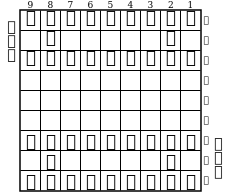

In [3]:
# Jupyterで実行している場合、盤面をsvgで表示できる
board

In [4]:
# テキスト形式で表示
print(board)

'  9  8  7  6  5  4  3  2  1
P1-KY-KE-GI-KI-OU-KI-GI-KE-KY
P2 * -HI *  *  *  *  * -KA * 
P3-FU-FU-FU-FU-FU-FU-FU-FU-FU
P4 *  *  *  *  *  *  *  *  * 
P5 *  *  *  *  *  *  *  *  * 
P6 *  *  *  *  *  *  *  *  * 
P7+FU+FU+FU+FU+FU+FU+FU+FU+FU
P8 * +KA *  *  *  *  * +HI * 
P9+KY+KE+GI+KI+OU+KI+GI+KE+KY
+



In [5]:
# 合法手の一覧
for move in board.legal_moves:
    print(move_to_usi(move))

1g1f
2g2f
3g3f
4g4f
5g5f
6g6f
7g7f
8g8f
9g9f
1i1h
9i9h
3i3h
3i4h
7i6h
7i7h
2h1h
2h3h
2h4h
2h5h
2h6h
2h7h
4i3h
4i4h
4i5h
6i5h
6i6h
6i7h
5i4h
5i5h
5i6h


In [6]:
# 指す
move = board.push_usi('7g7f')

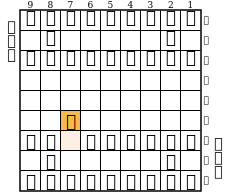

In [7]:
# svgで表示(直前の手も表示される)
board

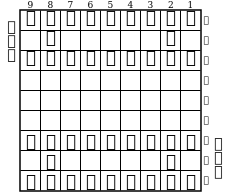

In [8]:
# 手を戻す
board.pop()

board

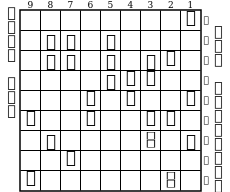

In [9]:
# sfen形式で局面を設定
board.set_sfen('8l/1+B+P1G4/1K+B1+P1+Pp1/4Ppp2/3s1n2p/l2g2ks1/1P4+n1P/2r6/+p6+s1 b R2GSNL4Pnl3p 187')

board

## USIエンジンの操作

### Lesserkaiのソースをダウンロードしてビルド

In [2]:
!wget http://shogidokoro.starfree.jp/download/LesserkaiSrc.zip
!unzip LesserkaiSrc.zip
%cd LesserkaiSrc/Lesserkai
!make
%cd -

--2021-07-10 13:51:28--  http://shogidokoro.starfree.jp/download/LesserkaiSrc.zip
Resolving shogidokoro.starfree.jp (shogidokoro.starfree.jp)... 157.112.187.101
Connecting to shogidokoro.starfree.jp (shogidokoro.starfree.jp)|157.112.187.101|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47694 (47K) [application/zip]
Saving to: ‘LesserkaiSrc.zip’

LesserkaiSrc.zip    100%[===================>]  46.58K  99.1KB/s    in 0.5s    

2021-07-10 13:51:29 (99.1 KB/s) - ‘LesserkaiSrc.zip’ saved [47694/47694]

Archive:  LesserkaiSrc.zip
  inflating: LesserkaiSrc/Lesserkai/Globals.cpp  
  inflating: LesserkaiSrc/Lesserkai/Joseki.cpp  
  inflating: LesserkaiSrc/Lesserkai/KomaMoves.cpp  
  inflating: LesserkaiSrc/Lesserkai/Kyokumen.cpp  
  inflating: LesserkaiSrc/Lesserkai/Kyokumen.h  
  inflating: LesserkaiSrc/Lesserkai/Lesserkai.cpp  
  inflating: LesserkaiSrc/Lesserkai/Lesserkai.vcxproj  
  inflating: LesserkaiSrc/Lesserkai/Lesserkai.vcxproj.filters  
  inflating: Lesserk

### USIエンジンを操作

In [ ]:
from cshogi.usi import Engine

engine = Engine('/content/LesserkaiSrc/Lesserkai/Lesserkai')

In [ ]:
# オプションの表示
engine.usi()

['id name Lesserkai 1.4.2',
 'id author Program Writer',
 'option name BookFile type string default public.bin',
 'option name UseBook type check default true']

In [ ]:
# オプション設定
engine.setoption('UseBook', 'false')

In [ ]:
# isreadyの送信
engine.isready()

In [ ]:
# usinewgameの送信
engine.usinewgame()

In [ ]:
# positionの送信
# 初期局面
engine.position()

In [ ]:
# 初期局面以外
engine.position(['7g7f'])

In [ ]:
# sfenで指定
engine.position(sfen='sfen 7nl/5kP2/3p2g1p/2p1gp3/p6sP/s1BGpN3/4nPSp1/1+r4R2/L1+p3K1L w GSNLPb6p 122')

In [ ]:
# goの送信
engine.go()

('8h3h', None)

In [ ]:
# 秒読み指定
engine.go(byoyomi=1000)

('3i3h', None)

In [ ]:
# エンジン終了
engine.quit()

In [ ]:
# エンジン再接続
engine.connect()

## USIエンジン同士の対局

1:usi
1:Lesserkai 1.4.2
1:isready
1:readyok
2:usi
2:Lesserkai 1.4.2
2:isready
2:readyok
Lesserkai 1.4.2 vs Lesserkai 1.4.2 start.
開始局面


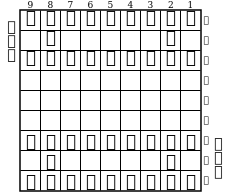

1:usinewgame
2:usinewgame
1:position startpos
1:go byoyomi 1000
1:info time 0 depth 1 nodes 33 score cp 10 pv 6i7h
1:info currmove 6i7h
1:info time 0 depth 2 nodes 126 score cp 0 pv 6i7h 4a3b
1:info currmove 6i7h
1:info time 1 depth 3 nodes 2076 score cp 3 pv 6i7h 4a3b 4i5h
1:info currmove 6i7h
1:info currmove 6i7h
1:info time 4 depth 4 nodes 6553 score cp 0 pv 6i7h 4a3b 4i5h 5a4b
1:info currmove 6i7h
1:info time 13 nodes 21490 score cp 0 pv 6i7h 4a3b 4i5h 5a4b
1:bestmove 6i7h
1手目


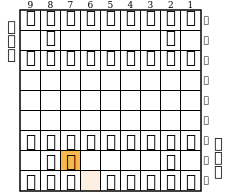

2:position startpos moves 6i7h
2:go byoyomi 1000
2:info time 1 depth 1 nodes 33 score cp 0 pv 4a3b
2:info currmove 4a3b
2:info time 1 depth 2 nodes 120 score cp -3 pv 4a3b 4i5h
2:info currmove 4a3b
2:info time 1 depth 3 nodes 1890 score cp 0 pv 4a3b 4i5h 5a4b
2:info currmove 4a3b
2:info currmove 4a3b
2:info time 3 depth 4 nodes 5981 score cp -3 pv 4a3b 4i5h 5a4b 5i6h
2:info currmove 4a3b
2:info time 11 nodes 19606 score cp -3 pv 4a3b 4i5h 5a4b 5i6h
2:bestmove 4a3b
2手目


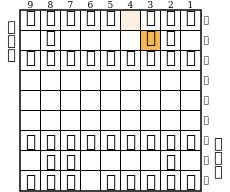

1:position startpos moves 6i7h 4a3b
1:go byoyomi 1000
1:info time 0 depth 1 nodes 30 score cp 3 pv 4i5h
1:info currmove 4i5h
1:info time 0 depth 2 nodes 116 score cp 0 pv 4i5h 5a4b
1:info currmove 4i5h
1:info time 1 depth 3 nodes 1035 score cp 3 pv 4i5h 5a4b 5i6h
1:info currmove 4i5h
1:info currmove 4i5h
1:info time 4 depth 4 nodes 4768 score cp 0 pv 4i5h 5a4b 5i6h 6a5b
1:info currmove 4i5h
1:info time 8 nodes 16107 score cp 0 pv 4i5h 5a4b 5i6h 6a5b
1:bestmove 4i5h
3手目


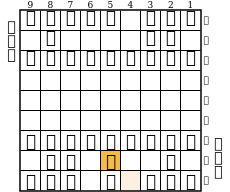

2:position startpos moves 6i7h 4a3b 4i5h
2:go byoyomi 1000
2:info time 1 depth 1 nodes 30 score cp 0 pv 5a4b
2:info currmove 5a4b
2:info time 1 depth 2 nodes 110 score cp -3 pv 5a4b 5i6h
2:info currmove 5a4b
2:info time 1 depth 3 nodes 942 score cp 0 pv 5a4b 5i6h 6a5b
2:info currmove 5a4b
2:info currmove 5a4b
2:info time 4 depth 4 nodes 4359 score cp -1 pv 5a4b 5i6h 6a5b 1g1f
2:info currmove 5a4b
2:info time 17 nodes 14210 score cp -1 pv 5a4b 5i6h 6a5b 1g1f
2:bestmove 5a4b
4手目


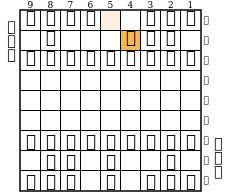

1:position startpos moves 6i7h 4a3b 4i5h 5a4b
1:go byoyomi 1000
1:info time 1 depth 1 nodes 27 score cp 3 pv 5i6h
1:info currmove 5i6h
1:info time 1 depth 2 nodes 104 score cp 0 pv 5i6h 6a5b
1:info currmove 5i6h
1:info time 1 depth 3 nodes 800 score cp 1 pv 5i6h 6a5b 1g1f
1:info currmove 5i6h
1:info currmove 5i6h
1:info time 4 depth 4 nodes 3880 score cp 0 pv 5i6h 6a5b 1g1f 1c1d
1:info currmove 5i6h
1:info time 10 nodes 12003 score cp 0 pv 5i6h 6a5b 1g1f 1c1d
1:bestmove 5i6h
5手目


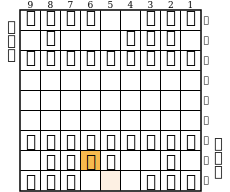

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h
2:go byoyomi 1000
2:info time 0 depth 1 nodes 27 score cp 0 pv 6a5b
2:info currmove 6a5b
2:info time 0 depth 2 nodes 96 score cp -1 pv 6a5b 1g1f
2:info currmove 6a5b
2:info time 0 depth 3 nodes 696 score cp 0 pv 6a5b 1g1f 1c1d
2:info currmove 6a5b
2:info currmove 6a5b
2:info time 4 depth 4 nodes 4407 score cp -3 pv 6a5b 6g6f 3c3d 5h6g
2:info currmove 6a5b
2:info time 9 depth 4 nodes 10503 score cp -2 pv 3c3d 1g1f 6a5b 1f1e
2:info time 11 nodes 17142 score cp -2 pv 3c3d 1g1f 6a5b 1f1e
2:bestmove 3c3d
6手目


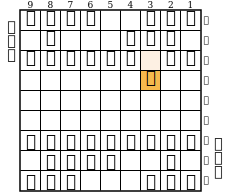

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d
1:go byoyomi 1000
1:info currmove 1g1f
1:info time 0 depth 1 nodes 4 score cp 3 pv 1g1f
1:info currmove 1g1f
1:info currmove 1g1f
1:info time 0 depth 2 nodes 113 score cp 0 pv 1g1f 6a5b
1:info currmove 1g1f
1:info currmove 1g1f
1:info time 1 depth 3 nodes 1596 score cp 2 pv 1g1f 6a5b 1f1e
1:info currmove 1g1f
1:info currmove 1g1f
1:info time 6 depth 4 nodes 5067 score cp 0 pv 1g1f 6a5b 1f1e 3d3e
1:info currmove 1g1f
1:info time 13 nodes 12010 score cp 0 pv 1g1f 6a5b 1f1e 3d3e
1:bestmove 1g1f
7手目


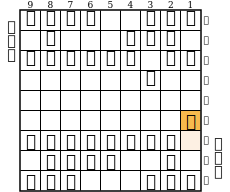

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f
2:go byoyomi 1000
2:info currmove 6a5b
2:info time 0 depth 1 nodes 3 score cp 0 pv 6a5b
2:info currmove 6a5b
2:info time 0 depth 2 nodes 119 score cp -2 pv 6a5b 1f1e
2:info currmove 6a5b
2:info currmove 6a5b
2:info time 1 depth 3 nodes 970 score cp 0 pv 6a5b 1f1e 3d3e
2:info currmove 6a5b
2:info currmove 6a5b
2:info time 7 depth 4 nodes 4579 score cp -1 pv 6a5b 1f1e 3d3e 2g2f
2:info currmove 6a5b
2:info time 18 nodes 18066 score cp -1 pv 6a5b 1f1e 3d3e 2g2f
2:bestmove 6a5b
8手目


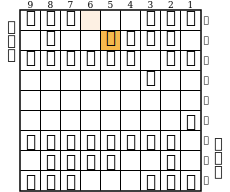

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b
1:go byoyomi 1000
1:info currmove 1f1e
1:info time 0 depth 1 nodes 4 score cp 2 pv 1f1e
1:info currmove 1f1e
1:info currmove 1f1e
1:info time 0 depth 2 nodes 110 score cp 0 pv 1f1e 3d3e
1:info currmove 1f1e
1:info currmove 1f1e
1:info time 0 depth 3 nodes 898 score cp 1 pv 1f1e 3d3e 2g2f
1:info currmove 1f1e
1:info currmove 1f1e
1:info time 4 depth 4 nodes 5361 score cp -2 pv 1f1e 2b3c 2g2f 3a2b
1:info currmove 1f1e
1:info time 28 nodes 32687 score cp -2 pv 1f1e 2b3c 2g2f 3a2b
1:bestmove 1f1e
9手目


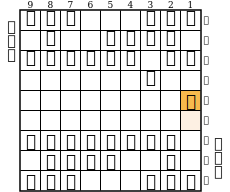

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e
2:go byoyomi 1000
2:info time 0 depth 1 nodes 32 score cp 0 pv 3d3e
2:info currmove 3d3e
2:info time 0 depth 2 nodes 105 score cp -1 pv 3d3e 2g2f
2:info currmove 3d3e
2:info time 1 depth 3 nodes 927 score cp 0 pv 3d3e 2g2f 2c2d
2:info currmove 3d3e
2:info time 2 depth 3 nodes 1743 score cp 1 pv 4c4d 2g2f 5b4c
2:info time 4 depth 3 nodes 2851 score cp 2 pv 2b3c 2g2f 3a2b
2:info currmove 3d3e
2:info time 6 depth 4 nodes 5359 score cp -2 pv 3d3e 2g2f 2c2d 2f2e
2:info currmove 2b3c
2:info time 8 depth 4 nodes 7089 score cp 0 pv 2b3c 2g2f 3a2b 2f2e
2:info time 18 nodes 16555 score cp 0 pv 2b3c 2g2f 3a2b 2f2e
2:bestmove 2b3c
10手目


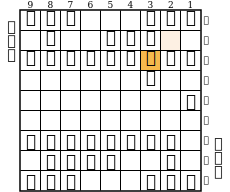

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c
1:go byoyomi 1000
1:info currmove 2g2f
1:info time 0 depth 1 nodes 4 score cp 3 pv 2g2f
1:info currmove 2g2f
1:info currmove 2g2f
1:info time 0 depth 2 nodes 112 score cp -2 pv 2g2f 3a2b
1:info currmove 2g2f
1:info currmove 2g2f
1:info time 1 depth 3 nodes 928 score cp 0 pv 2g2f 3a2b 2f2e
1:info currmove 2g2f
1:info currmove 2g2f
1:info time 3 depth 4 nodes 4221 score cp -2 pv 2g2f 3a2b 2f2e 3d3e
1:info currmove 2g2f
1:info time 12 nodes 13304 score cp -2 pv 2g2f 3a2b 2f2e 3d3e
1:bestmove 2g2f
11手目


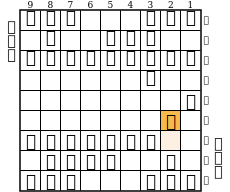

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f
2:go byoyomi 1000
2:info time 0 depth 1 nodes 33 score cp 2 pv 3a2b
2:info currmove 3a2b
2:info time 0 depth 2 nodes 109 score cp 0 pv 3a2b 2f2e
2:info currmove 3a2b
2:info time 1 depth 3 nodes 1023 score cp 2 pv 3a2b 2f2e 3d3e
2:info currmove 3a2b
2:info currmove 3a2b
2:info time 5 depth 4 nodes 4541 score cp 1 pv 3a2b 2f2e 3d3e 4g4f
2:info currmove 3a2b
2:info time 13 nodes 15402 score cp 1 pv 3a2b 2f2e 3d3e 4g4f
2:bestmove 3a2b
12手目


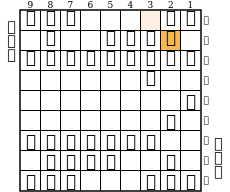

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b
1:go byoyomi 1000
1:info currmove 2f2e
1:info time 0 depth 1 nodes 4 score cp 0 pv 2f2e
1:info currmove 2f2e
1:info currmove 2f2e
1:info time 0 depth 2 nodes 112 score cp -2 pv 2f2e 3d3e
1:info currmove 2f2e
1:info currmove 2f2e
1:info time 1 depth 3 nodes 901 score cp -1 pv 2f2e 3d3e 4g4f
1:info currmove 2f2e
1:info currmove 2f2e
1:info time 13 depth 4 nodes 5941 score cp -4 pv 2f2e 3c4d 2e2d 2c2d
1:info currmove 2f2e
1:info time 32 nodes 26875 score cp -4 pv 2f2e 3c4d 2e2d 2c2d
1:bestmove 2f2e
13手目


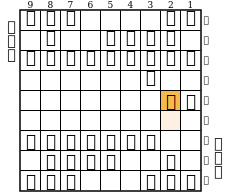

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e
2:go byoyomi 1000
2:info currmove 3d3e
2:info time 0 depth 1 nodes 4 score cp 2 pv 3d3e
2:info currmove 3d3e
2:info currmove 3d3e
2:info time 0 depth 2 nodes 112 score cp 1 pv 3d3e 4g4f
2:info currmove 3d3e
2:info currmove 3d3e
2:info time 1 depth 3 nodes 959 score cp 2 pv 3d3e 4g4f 4c4d
2:info currmove 3d3e
2:info time 2 depth 3 nodes 1758 score cp 3 pv 4c4d 3g3f 5b4c
2:info time 4 depth 3 nodes 2964 score cp 4 pv 3c4d 2e2d 2c2d
2:info currmove 3d3e
2:info time 7 depth 4 nodes 6311 score cp 1 pv 3d3e 4g4f 4c4d 5g5f
2:info currmove 3c4d
2:info time 17 nodes 17546 score cp 1 pv 3d3e 4g4f 4c4d 5g5f
2:bestmove 3d3e
14手目


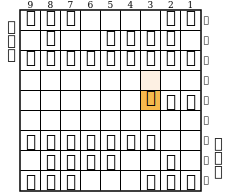

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e
1:go byoyomi 1000
1:info currmove 4g4f
1:info time 0 depth 1 nodes 4 score cp -1 pv 4g4f
1:info currmove 4g4f
1:info currmove 4g4f
1:info time 1 depth 2 nodes 113 score cp -2 pv 4g4f 4c4d
1:info currmove 4g4f
1:info currmove 4g4f
1:info time 1 depth 3 nodes 903 score cp -1 pv 4g4f 4c4d 5g5f
1:info currmove 4g4f
1:info currmove 4g4f
1:info time 6 depth 4 nodes 4819 score cp -4 pv 4g4f 4c4d 5g5f 5b4c
1:info currmove 4g4f
1:info time 20 nodes 22720 score cp -4 pv 4g4f 4c4d 5g5f 5b4c
1:bestmove 4g4f
15手目


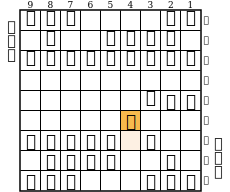

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f
2:go byoyomi 1000
2:info currmove 4c4d
2:info time 0 depth 1 nodes 4 score cp 2 pv 4c4d
2:info currmove 4c4d
2:info currmove 4c4d
2:info time 0 depth 2 nodes 113 score cp 1 pv 4c4d 5g5f
2:info currmove 4c4d
2:info currmove 4c4d
2:info time 1 depth 3 nodes 946 score cp 4 pv 4c4d 5g5f 5b4c
2:info currmove 4c4d
2:info currmove 4c4d
2:info time 5 depth 4 nodes 4792 score cp 1 pv 4c4d 6g6f 5b4c 5h6g
2:info currmove 4c4d
2:info time 10 depth 4 nodes 9258 score cp 4 pv 3c5e 2h2f 2b3c 4f4e
2:info time 20 nodes 17183 score cp 4 pv 3c5e 2h2f 2b3c 4f4e
2:bestmove 3c5e
16手目


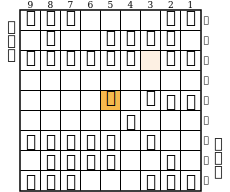

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e
1:go byoyomi 1000
1:info currmove 4f4e
1:info time 0 depth 1 nodes 4 score cp 1 pv 4f4e
1:info currmove 4f4e
1:info currmove 4f4e
1:info time 0 depth 2 nodes 124 score cp -4 pv 4f4e 2b3c
1:info currmove 4f4e
1:info currmove 4f4e
1:info time 3 depth 3 nodes 2750 score cp -192 pv 4f4e 2a3c 2e2d
1:info currmove 4f4e
1:info time 4 depth 3 nodes 3698 score cp -4 pv 2h2f 2b3c 4f4e
1:info currmove 4f4e
1:info time 10 depth 4 nodes 8435 score cp -3 pv 4f4e 2b3c 5g5f 5e4f
1:info currmove 2h2f
1:info time 25 nodes 20596 score cp -3 pv 4f4e 2b3c 5g5f 5e4f
1:bestmove 4f4e
17手目


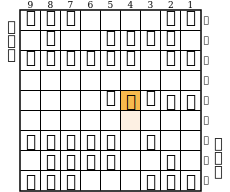

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e
2:go byoyomi 1000
2:info time 1 depth 1 nodes 39 score cp 0 pv 4c4d
2:info time 1 depth 1 nodes 41 score cp 4 pv 2b3c
2:info currmove 2b3c
2:info time 1 depth 2 nodes 119 score cp 3 pv 2b3c 5g5f
2:info time 1 depth 2 nodes 212 score cp 192 pv 2a3c 2e2d
2:info currmove 2a3c
2:info time 2 depth 3 nodes 1204 score cp -2 pv 2a3c 5g5f 5e4f
2:info currmove 2b3c
2:info time 4 depth 3 nodes 2066 score cp 3 pv 2b3c 5g5f 5e4f
2:info currmove 2a3c
2:info time 19 depth 4 nodes 7329 score cp 195 pv 2a3c 2e2d 3c4e 3i3h
2:info currmove 2b3c
2:info time 48 depth 4 nodes 31412 score cp 1289 pv 3e3f 2h2f 3f3g+ 2e2d
2:info time 48 nodes 31412 score cp 1289 pv 3e3f 2h2f 3f3g+ 2e2d
2:bestmove 3e3f
18手目


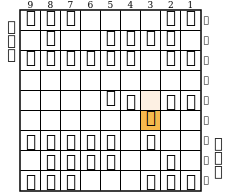

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f
1:go byoyomi 1000
1:info currmove 5h4g
1:info time 0 depth 1 nodes 4 score cp -24 pv 5h4g
1:info currmove 5g5f
1:info time 0 depth 1 nodes 35 score cp -11 pv 2h3h
1:info currmove 2h3h
1:info time 0 depth 2 nodes 126 score cp -11 pv 2h3h 3f3g
1:info currmove 5g5f
1:info time 0 depth 2 nodes 200 score cp 195 pv 5g5f 5e4f
1:info currmove 2h3h
1:info time 3 depth 3 nodes 1881 score cp -1301 pv 2h3h 3f3g+ 3h1h
1:info currmove 5g5f
1:info time 5 depth 3 nodes 3381 score cp -1289 pv 2h2f 3f3g+ 2e2d
1:info currmove 5g5f
1:info time 10 depth 4 nodes 8133 score cp -415 pv 5g5f 5e3g+ 2h1h 3g4f
1:info currmove 2h2f
1:info time 35 nodes 26253 score cp -415 pv 5g5f 5e3g+ 2h1h 3g4f
1:bestmove 5g5f
19手目


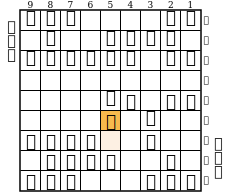

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f
2:go byoyomi 1000
2:info currmove 5e4f
2:info time 0 depth 1 nodes 3 score cp -195 pv 5e4f
2:info currmove 5e4f
2:info time 0 depth 2 nodes 89 score cp 1317 pv 5e4f 6h6i
2:info currmove 5e4f
2:info currmove 5e4f
2:info time 1 depth 3 nodes 425 score cp -182 pv 5e4f 5h5g 4f6d
2:info currmove 5e4f
2:info time 16 depth 3 nodes 1351 score cp 415 pv 5e3g+ 2h1h 3g4f
2:info currmove 5e3g+
2:info time 23 depth 4 nodes 5238 score cp 622 pv 5e3g+ 2h1h 3g4f 6h6i
2:info currmove 5e4f
2:info time 25 depth 4 nodes 7286 score cp 1483 pv 5e4f 6h6i 3f3g+ 2h2f
2:info time 72 nodes 44577 score cp 1483 pv 5e4f 6h6i 3f3g+ 2h2f
2:bestmove 5e4f
20手目


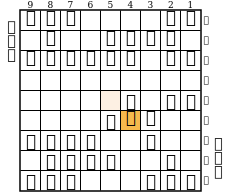

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f
1:go byoyomi 1000
1:info currmove 5h5g
1:info time 0 depth 1 nodes 3 score cp -1328 pv 5h5g
1:info time 0 depth 1 nodes 9 score cp -1317 pv 6h6i
1:info currmove 5h5g
1:info time 0 depth 2 nodes 86 score cp 182 pv 5h5g 4f6d
1:info currmove 6h6i
1:info currmove 5h5g
1:info time 2 depth 3 nodes 1123 score cp -1313 pv 5h5g 3f3g+ 2h2f
1:info currmove 6h6i
1:info time 3 depth 3 nodes 2121 score cp -1302 pv 6h6i 3f3g+ 2h2f
1:info currmove 5h5g
1:info time 7 depth 4 nodes 5898 score cp -1313 pv 5h5g 3f3g+ 2h2f 4f6d
1:info currmove 6h6i
1:info time 12 depth 4 nodes 10123 score cp -1312 pv 6h6i 3f3g+ 2h2f P*3f
1:info time 13 nodes 11134 score cp -1312 pv 6h6i 3f3g+ 2h2f P*3f
1:bestmove 6h6i
21手目


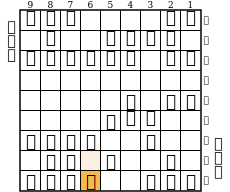

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i
2:go byoyomi 1000
2:info currmove 3f3g+
2:info time 0 depth 1 nodes 4 score cp 1302 pv 3f3g+
2:info currmove 3f3g+
2:info currmove 3f3g+
2:info time 0 depth 2 nodes 131 score cp 1302 pv 3f3g+ 2h2f
2:info currmove 3f3g+
2:info currmove 3f3g+
2:info time 2 depth 3 nodes 1296 score cp 1312 pv 3f3g+ 2h2f P*3f
2:info currmove 3f3g+
2:info currmove 3f3g+
2:info time 10 depth 4 nodes 7126 score cp 2057 pv 3f3g+ 2h1h P*3h 3i4h
2:info currmove 3f3g+
2:info time 54 nodes 35963 score cp 2057 pv 3f3g+ 2h1h P*3h 3i4h
2:bestmove 3f3g+
22手目


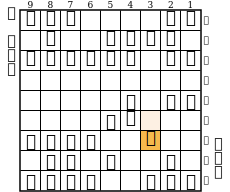

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+
1:go byoyomi 1000
1:info time 0 depth 1 nodes 32 score cp -1302 pv 2h2f
1:info currmove 2h2f
1:info time 0 depth 2 nodes 146 score cp -1312 pv 2h2f P*3f
1:info currmove 2h2f
1:info time 3 depth 3 nodes 1719 score cp -2457 pv 2h2f 3g4g 2f1f
1:info currmove 2h2f
1:info time 4 depth 3 nodes 2847 score cp -2057 pv 2h1h P*3h 3i4h
1:info currmove 2h2f
1:info time 10 depth 4 nodes 9104 score cp -1396 pv 2h2f 4f7i+ 8h7i S*3f
1:info currmove 2h1h
1:info time 47 nodes 36540 score cp -1396 pv 2h2f 4f7i+ 8h7i S*3f
1:bestmove 2h2f
23手目


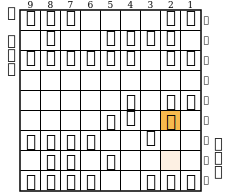

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f
2:go byoyomi 1000
2:info currmove 3g4g
2:info time 1 depth 1 nodes 4 score cp -3 pv 3g4g
2:info currmove P*3f
2:info time 1 depth 1 nodes 5 score cp 1312 pv P*3f
2:info currmove 3g4g
2:info time 1 depth 2 nodes 153 score cp 2457 pv 3g4g 2f1f
2:info currmove P*3f
2:info currmove 3g4g
2:info time 3 depth 3 nodes 1567 score cp 75 pv 3g4g 2f1f 4g5h
2:info currmove P*3f
2:info time 5 depth 3 nodes 2313 score cp 1316 pv P*3f 6g6f 2b3c
2:info time 6 depth 3 nodes 2990 score cp 1396 pv 4f7i+ 8h7i S*3f
2:info currmove 4f7i+
2:info time 30 depth 4 nodes 16178 score cp 1843 pv 4f7i+ 8h7i P*3h 3i4h
2:info currmove 3g4g
2:info time 37 depth 4 nodes 19802 score cp 2682 pv 3g4g 5h4g 4f1i+ 2e2d
2:info time 110 nodes 84493 score cp 2682 pv 3g4g 5h4g 4f1i+ 2e2d
2:bestmove 3g4g
24手目


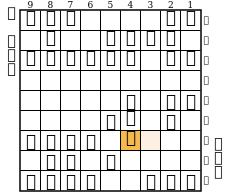

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g
1:go byoyomi 1000
1:info currmove 2f1f
1:info time 1 depth 1 nodes 4 score cp -2457 pv 2f1f
1:info currmove 2f1f
1:info currmove 2f1f
1:info time 1 depth 2 nodes 157 score cp -75 pv 2f1f 4g5h
1:info currmove 2f1f
1:info currmove 2f1f
1:info time 5 depth 3 nodes 1505 score cp -3563 pv 2f1f 4g5h 6i5h
1:info currmove 2f1f
1:info time 7 depth 3 nodes 3300 score cp -2670 pv 5h4g 4f1i+ 2e2d
1:info currmove 5h4g
1:info time 19 depth 4 nodes 12468 score cp -2817 pv 5h4g 4f1i+ 2e2d L*1h
1:info currmove 2f1f
1:info time 36 depth 4 nodes 19218 score cp -2754 pv 5h5i 4f1i+ 5i4i P*3h
1:info time 51 nodes 34225 score cp -2754 pv 5h5i 4f1i+ 5i4i P*3h
1:bestmove 5h5i
25手目


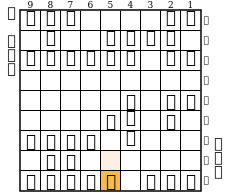

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i
2:go byoyomi 1000
2:info currmove 4f1i+
2:info time 1 depth 1 nodes 4 score cp 2754 pv 4f1i+
2:info currmove 4f1i+
2:info currmove 4f1i+
2:info time 4 depth 2 nodes 145 score cp 2742 pv 4f1i+ 2e2d
2:info currmove 4f1i+
2:info currmove 4f1i+
2:info time 11 depth 3 nodes 2918 score cp 2754 pv 4f1i+ 5i4i P*3h
2:info currmove 4f1i+
2:info currmove 4f1i+
2:info time 25 depth 4 nodes 11217 score cp 2959 pv 4f1i+ 2i1g 1i1h 2f1f
2:info currmove 4f1i+
2:info time 68 depth 4 nodes 45970 score cp 3674 pv P*3g 2f3f 3g3h+ 3f3b+
2:info time 89 nodes 66765 score cp 3674 pv P*3g 2f3f 3g3h+ 3f3b+
2:bestmove P*3g
26手目


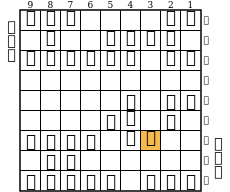

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g
1:go byoyomi 1000
1:info currmove 5i4i
1:info time 0 depth 1 nodes 3 score cp -1315 pv 5i4i
1:info currmove 5i4i
1:info time 0 depth 2 nodes 130 score cp -1840 pv 5i4i 3g3h+
1:info currmove 5i4i
1:info time 1 depth 2 nodes 940 score cp -1455 pv 2f2g 4f5g+
1:info currmove 5i4i
1:info time 3 depth 3 nodes 2052 score cp -3831 pv 5i4i 3g3h+ 6i5i
1:info currmove 2f2g
1:info time 6 depth 3 nodes 4426 score cp -2983 pv 2f4f 4g4f 4e4d
1:info currmove 2f4f
1:info time 17 depth 4 nodes 10619 score cp -3391 pv 2f4f 4g4f 4e4d R*2g
1:info currmove 2f2g
1:info time 35 depth 4 nodes 15143 score cp -2833 pv 2f2g 3g3h+ 2g4g 4f1i+
1:info time 55 nodes 26246 score cp -2833 pv 2f2g 3g3h+ 2g4g 4f1i+
1:bestmove 2f2g
27手目


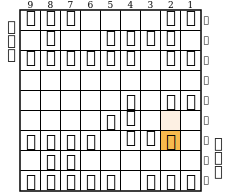

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g
2:go byoyomi 1000
2:info currmove 3g3h+
2:info time 0 depth 1 nodes 3 score cp 1110 pv 3g3h+
2:info time 1 depth 1 nodes 49 score cp 1455 pv 4f5g+
2:info currmove 3g3h+
2:info time 1 depth 2 nodes 129 score cp 4460 pv 3g3h+ 2g2f
2:info currmove 4f5g+
2:info currmove 3g3h+
2:info time 4 depth 3 nodes 2164 score cp 2833 pv 3g3h+ 2g4g 4f1i+
2:info currmove 4f5g+
2:info currmove 3g3h+
2:info time 15 depth 4 nodes 7158 score cp 4375 pv 3g3h+ 2g4g 4f7i+ 8h7i
2:info currmove 3g3h+
2:info time 50 nodes 33950 score cp 4375 pv 3g3h+ 2g4g 4f7i+ 8h7i
2:bestmove 3g3h+
28手目


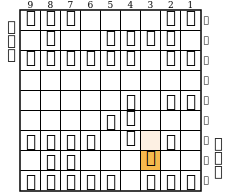

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+
1:go byoyomi 1000
1:info time 0 depth 1 nodes 31 score cp -4212 pv 2g4g
1:info currmove 2g4g
1:info time 0 depth 2 nodes 146 score cp -2471 pv 2g4g 4f1i+
1:info currmove 2g4g
1:info time 2 depth 3 nodes 1953 score cp -4354 pv 2g4g 4f7i+ 8h7i
1:info currmove 2g4g
1:info currmove 2g4g
1:info time 12 depth 4 nodes 9134 score cp -4356 pv 2g4g 4f7i+ 8h7i 3h3i
1:info currmove 2g4g
1:info time 48 nodes 28759 score cp -4356 pv 2g4g 4f7i+ 8h7i 3h3i
1:bestmove 2g4g
29手目


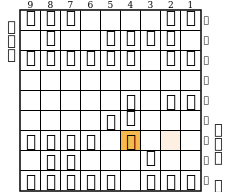

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g
2:go byoyomi 1000
2:info currmove 4f1i+
2:info time 0 depth 1 nodes 4 score cp 1246 pv 4f1i+
2:info currmove 4f7i+
2:info currmove 4f1i+
2:info time 0 depth 2 nodes 167 score cp 2478 pv 4f1i+ 3i3h
2:info currmove 4f7i+
2:info time 0 depth 2 nodes 179 score cp 2776 pv 4f7i+ 8h7i
2:info currmove 4f1i+
2:info time 3 depth 3 nodes 2734 score cp 2326 pv 4f1i+ P*3c 3h3i
2:info currmove 4f7i+
2:info time 4 depth 3 nodes 3117 score cp 2770 pv 4f7i+ 8h7i 3h3i
2:info currmove 4f7i+
2:info time 21 depth 4 nodes 12334 score cp 3370 pv 4f7i+ 8h7i 3h2i 5i4i
2:info currmove 4f7i+
2:info time 87 nodes 65908 score cp 3370 pv 4f7i+ 8h7i 3h2i 5i4i
2:bestmove 4f7i+
30手目


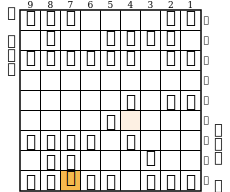

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+
1:go byoyomi 1000
1:info currmove 8h7i
1:info time 1 depth 1 nodes 4 score cp -2579 pv 8h7i
1:info currmove 8h7i
1:info currmove 8h7i
1:info time 1 depth 2 nodes 149 score cp -2574 pv 8h7i 3h3i
1:info currmove 8h7i
1:info currmove 8h7i
1:info time 19 depth 3 nodes 5130 score cp -3175 pv 8h7i 3h2i 5i4i
1:info currmove 8h7i
1:info currmove 8h7i
1:info time 38 depth 4 nodes 15946 score cp -2814 pv 8h7i 3h3i P*3c 4b3c
1:info currmove 8h7i
1:info time 54 depth 4 nodes 33649 score cp -2810 pv 6i7i 3h3i P*3c 2b3c
1:info time 59 nodes 37475 score cp -2810 pv 6i7i 3h3i P*3c 2b3c
1:bestmove 6i7i
31手目


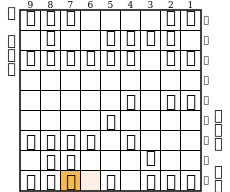

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i
2:go byoyomi 1000
2:info currmove 3h3i
2:info time 0 depth 1 nodes 4 score cp 1500 pv 3h3i
2:info currmove 3h2i
2:info currmove 3h3i
2:info time 1 depth 2 nodes 279 score cp 1500 pv 3h3i 2i3g
2:info currmove 3h2i
2:info time 1 depth 2 nodes 425 score cp 2115 pv 3h2i 5i4i
2:info currmove 3h3i
2:info time 11 depth 3 nodes 9248 score cp 1505 pv 3h3i 2i3g 2b3c
2:info currmove 3h2i
2:info currmove 3h3i
2:info time 39 depth 4 nodes 31683 score cp 1530 pv 3h3i 2i1g S*2f B*4h
2:info currmove 3h2i
2:info time 89 depth 4 nodes 60156 score cp 2114 pv 3h2i 3i3h 2i1i 5i5h
2:info time 187 nodes 161122 score cp 2114 pv 3h2i 3i3h 2i1i 5i5h
2:bestmove 3h2i
32手目


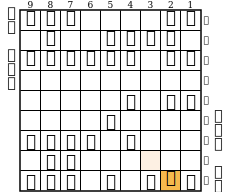

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i
1:go byoyomi 1000
1:info currmove P*3c
1:info time 0 depth 1 nodes 3 score cp -2935 pv P*3c
1:info time 0 depth 1 nodes 86 score cp -2120 pv 3i3h
1:info time 0 depth 1 nodes 88 score cp -2115 pv 5i4i
1:info currmove 5i4i
1:info time 1 depth 2 nodes 333 score cp -2124 pv 5i4i 2i1i
1:info currmove P*3c
1:info time 2 depth 2 nodes 511 score cp -1110 pv P*3c 2b3c
1:info currmove 5i4i
1:info time 25 depth 3 nodes 13331 score cp -2720 pv 5i4i 2i3i 4i3i
1:info currmove P*3c
1:info time 37 depth 3 nodes 18821 score cp -2330 pv P*3c 2b3c 5i4i
1:info time 43 depth 3 nodes 25136 score cp -2114 pv 3i3h 2i1i 5i5h
1:info currmove 3i3h
1:info time 70 depth 4 nodes 53242 score cp -2101 pv 3i3h 2i1i 4g1g L*1h
1:info currmove P*3c
1:info time 248 depth 4 nodes 268352 score cp -2004 pv 7g7f 2i3i B*6f 3i2i
1:info time 2

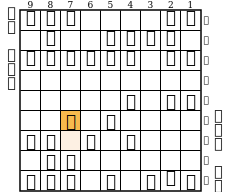

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f
2:go byoyomi 1000
2:info currmove 2i3i
2:info time 0 depth 1 nodes 3 score cp 2934 pv 2i3i
2:info currmove 2i3i
2:info time 0 depth 2 nodes 336 score cp 2919 pv 2i3i 5i5h
2:info currmove 2i3i
2:info currmove 2i3i
2:info time 15 depth 3 nodes 13767 score cp 2004 pv 2i3i B*6f 3i2i
2:info currmove 2i3i
2:info currmove 2i3i
2:info time 111 depth 4 nodes 97370 score cp 3019 pv 2i3i 4g4f 2a3c B*1f
2:info currmove 2i3i
2:info time 371 nodes 319687 score cp 3019 pv 2i3i 4g4f 2a3c B*1f
2:bestmove 2i3i
34手目


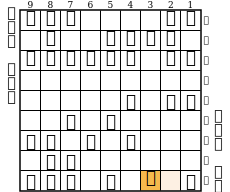

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i
1:go byoyomi 1000
1:info currmove B*6f
1:info time 1 depth 1 nodes 3 score cp -3024 pv B*6f
1:info time 1 depth 1 nodes 96 score cp -2934 pv 4g3g
1:info time 1 depth 1 nodes 104 score cp -2919 pv 5i5h
1:info currmove B*6f
1:info time 1 depth 2 nodes 341 score cp -2004 pv B*6f 3i2i
1:info currmove 5i5h
1:info currmove B*6f
1:info time 7 depth 3 nodes 4550 score cp -3164 pv B*6f S*3f 4g4f
1:info currmove 5i5h
1:info time 15 depth 3 nodes 11376 score cp -3059 pv 5i5h S*3f 4g4f
1:info time 34 depth 3 nodes 28342 score cp -3019 pv 4g4f 2a3c B*1f
1:info currmove B*6f
1:info time 90 depth 4 nodes 76543 score cp -2964 pv B*6f S*3h 4g4h 2b3c
1:info currmove 4g4f
1:info time 209 depth 4 nodes 204413 score cp -2927 pv 4e4d 2b3c 4g3g 3i2i
1:info time 501 nodes 521961 score cp -3019 pv 4e4d 2b3c 4g3g 3i

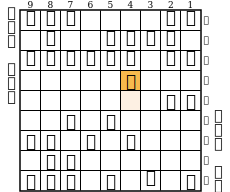

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d
2:go byoyomi 1000
2:info currmove 4c4d
2:info time 0 depth 1 nodes 4 score cp 2938 pv 4c4d
2:info currmove S*3f
2:info currmove 4c4d
2:info time 1 depth 2 nodes 352 score cp 2932 pv 4c4d 4g4d
2:info currmove S*3f
2:info time 1 depth 2 nodes 498 score cp 3062 pv S*3f 4g4f
2:info currmove 4c4d
2:info time 23 depth 3 nodes 22103 score cp 2933 pv 4c4d 4g4d 4b3c
2:info currmove S*3f
2:info currmove 4c4d
2:info time 38 depth 4 nodes 37070 score cp 2927 pv 4c4d 4g4d P*4c 4d3d
2:info currmove S*3f
2:info time 61 depth 4 nodes 57215 score cp 3064 pv S*3f 4d4c 3b4c 4g4f
2:info time 127 nodes 111397 score cp 3064 pv S*3f 4d4c 3b4c 4g4f
2:bestmove S*3f
36手目


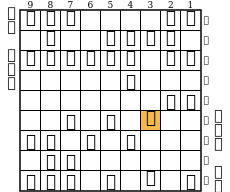

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f
1:go byoyomi 1000
1:info currmove 4d4c
1:info time 14 depth 1 nodes 3 score cp -6957 pv 4d4c
1:info time 14 depth 1 nodes 89 score cp -3062 pv 4g4f
1:info currmove 4g4f
1:info time 29 depth 2 nodes 360 score cp -3067 pv 4g4f 3f3g+
1:info currmove 4d4c
1:info time 29 depth 2 nodes 372 score cp -2862 pv 4d4c 5b4c
1:info currmove 4g4f
1:info time 54 depth 3 nodes 10318 score cp -3052 pv 4g4f 3f3g+ 5i5h
1:info currmove 4d4c
1:info currmove 4g4f
1:info time 92 depth 4 nodes 34998 score cp -3067 pv 4g4f 3f3g+ 4d4c 5b4c
1:info currmove 4d4c
1:info time 357 nodes 297469 score cp -3067 pv 4g4f 3f3g+ 4d4c 5b4c
1:bestmove 4g4f
37手目


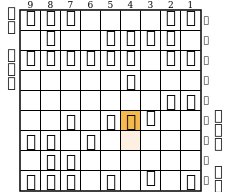

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f
2:go byoyomi 1000
2:info currmove S*4g
2:info time 0 depth 1 nodes 4 score cp 2797 pv S*4g
2:info currmove S*2h
2:info time 1 depth 1 nodes 124 score cp 3065 pv 3f2e
2:info time 1 depth 1 nodes 128 score cp 3067 pv 3f3g+
2:info currmove 3f3g+
2:info time 1 depth 2 nodes 354 score cp 3052 pv 3f3g+ 5i5h
2:info currmove S*2h
2:info currmove 3f3g+
2:info time 17 depth 3 nodes 7100 score cp 3067 pv 3f3g+ 4d4c 5b4c
2:info currmove 3f3g+
2:info currmove 3f3g+
2:info time 40 depth 4 nodes 26591 score cp 3052 pv 3f3g+ 4d4c 5b4c 5i5h
2:info currmove 3f3g+
2:info time 238 depth 4 nodes 170566 score cp 3055 pv 3i2i 1i1f 3f3g+ 5i5h
2:info time 501 nodes 354876 score cp 3067 pv 3i2i 1i1f 3f3g+ 5i5h
2:bestmove 3i2i
38手目


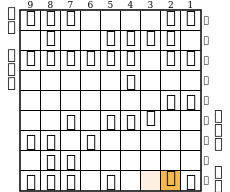

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i
1:go byoyomi 1000
1:info currmove 4d4c
1:info time 17 depth 1 nodes 4 score cp -3882 pv 4d4c
1:info currmove 4d4c+
1:info time 28 depth 1 nodes 5 score cp -2872 pv 4d4c+
1:info currmove 4d4c
1:info time 55 depth 2 nodes 159 score cp -807 pv 4d4c 5b4c
1:info currmove 4d4c+
1:info currmove 4d4c
1:info time 109 depth 3 nodes 7212 score cp -3062 pv 4d4c 5b4c 4f4i
1:info currmove 4d4c+
1:info time 136 depth 3 nodes 17276 score cp -3055 pv 1i1f 3f3g+ 5i5h
1:info currmove 4d4c
1:info time 206 depth 4 nodes 37621 score cp -1831 pv 4d4c 5b4c P*4d 2i1i
1:info currmove 1i1f
1:info time 321 depth 4 nodes 129031 score cp -1024 pv P*3c 2b3c 4d4c 3b4c
1:info time 475 nodes 299025 score cp -1024 pv P*3c 2b3c 4d4c 3b4c
1:bestmove P*3c
39手目


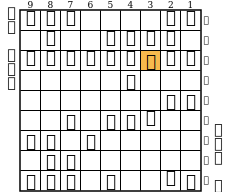

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c
2:go byoyomi 1000
2:info currmove 3b3c
2:info time 2 depth 1 nodes 3 score cp 1004 pv 3b3c
2:info time 2 depth 1 nodes 121 score cp 1018 pv 4b3c
2:info time 2 depth 1 nodes 123 score cp 1831 pv 2i1i
2:info currmove 3b3c
2:info time 2 depth 2 nodes 338 score cp 3069 pv 3b3c 4d4c+
2:info currmove 2i1i
2:info time 3 depth 2 nodes 662 score cp 3083 pv 4b3c 4d4c+
2:info time 5 depth 2 nodes 1599 score cp 3087 pv 2b3c 4d4c+
2:info time 6 depth 2 nodes 1975 score cp 3111 pv 3f4g+ 4f4g
2:info currmove 2i1i
2:info time 21 depth 3 nodes 15264 score cp -203 pv 2i1i 3c3b+ 4b3b
2:info currmove 3f4g+
2:info time 27 depth 3 nodes 21984 score cp 1004 pv 3b3c 4d4c+ 5b4c
2:info time 35 depth 3 nodes 29780 score cp 1024 pv 2b3c 4d4c+ 3b4c
2:info currmove 2b3c
2:info time 47 depth 4 no

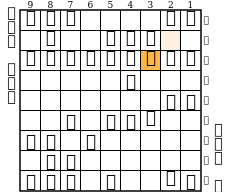

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c
1:go byoyomi 1000
1:info currmove 4d4c
1:info time 12 depth 1 nodes 3 score cp -4097 pv 4d4c
1:info time 12 depth 1 nodes 81 score cp -3331 pv 4f3f
1:info time 12 depth 1 nodes 83 score cp -3278 pv 1i1h
1:info time 12 depth 1 nodes 86 score cp -3087 pv 4d4c+
1:info currmove 4d4c
1:info time 27 depth 2 nodes 148 score cp -1024 pv 4d4c 3b4c
1:info currmove 4d4c+
1:info currmove 4d4c
1:info time 41 depth 3 nodes 906 score cp -3279 pv 4d4c 3b4c 4f4i
1:info currmove 4d4c+
1:info currmove 4d4c
1:info time 85 depth 4 nodes 31521 score cp -2048 pv 4d4c 3b4c P*4d 2i1i
1:info currmove 4d4c
1:info time 254 nodes 214841 score cp -2048 pv 4d4c 3b4c P*4d 2i1i
1:bestmove 4d4c
41手目


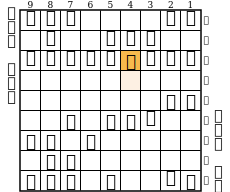

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c
2:go byoyomi 1000
2:info currmove 3b4c
2:info time 0 depth 1 nodes 4 score cp 1024 pv 3b4c
2:info currmove 3b4c
2:info currmove 3b4c
2:info time 0 depth 2 nodes 177 score cp 3279 pv 3b4c 4f4i
2:info currmove 3b4c
2:info currmove 3b4c
2:info time 9 depth 3 nodes 8771 score cp 2048 pv 3b4c P*4d 2i1i
2:info currmove 3b4c
2:info currmove 3b4c
2:info time 104 depth 4 nodes 91178 score cp 3285 pv 3b4c 1i1h 3f2g+ 4f4h
2:info currmove 3b4c
2:info time 247 nodes 196861 score cp 3285 pv 3b4c 1i1h 3f2g+ 4f4h
2:bestmove 3b4c
42手目


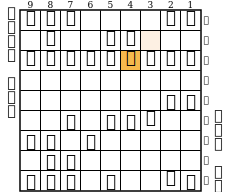

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c
1:go byoyomi 1000
1:info currmove P*4d
1:info time 24 depth 1 nodes 4 score cp -4294 pv P*4d
1:info currmove 4f4i
1:info time 24 depth 1 nodes 5 score cp -3279 pv 4f4i
1:info currmove P*4d
1:info time 49 depth 2 nodes 398 score cp -2048 pv P*4d 2i1i
1:info currmove 4f4i
1:info currmove P*4d
1:info time 84 depth 3 nodes 9140 score cp -3328 pv P*4d 3f4g+ 4f4g
1:info currmove 4f4i
1:info time 115 depth 3 nodes 20114 score cp -3285 pv 1i1h 3f2g+ 4f4h
1:info currmove 1i1h
1:info time 185 depth 4 nodes 83161 score cp -3285 pv 1i1h 3f3g 4f3f 3g2h+
1:info currmove P*4d
1:info time 211 depth 4 nodes 112216 score cp -2283 pv P*4d 4c4d 8h4d 3c4d
1:info time 501 nodes 446408 score cp -3285 pv P*4d 4c4d 8h4d 3c4d
1:bestmove P*4d
43手目


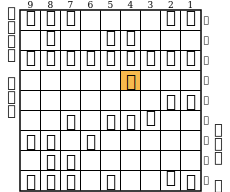

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d
2:go byoyomi 1000
2:info currmove 2i1i
2:info time 0 depth 1 nodes 4 score cp 2048 pv 2i1i
2:info currmove 3f4g+
2:info currmove 2i1i
2:info time 1 depth 2 nodes 368 score cp 2058 pv 2i1i 4d4c
2:info currmove 3f4g+
2:info time 1 depth 2 nodes 500 score cp 3328 pv 3f4g+ 4f4g
2:info currmove 2i1i
2:info time 10 depth 3 nodes 9224 score cp 8 pv 2i1i 4d4c 5b4c
2:info currmove 3f4g+
2:info time 17 depth 3 nodes 16490 score cp 1027 pv 3f2e 4d4c 5b4c
2:info time 23 depth 3 nodes 23140 score cp 2461 pv 4c4d 2e2d 2i1i
2:info currmove 4c4d
2:info time 67 depth 4 nodes 56968 score cp 2791 pv 4c4d 8h4d 3c4d 4f4d
2:info currmove 3f4g+
2:info time 191 depth 4 nodes 142435 score cp 3365 pv 4c3d 1i1h 3f2g+ B*3f
2:info time 501 nodes 360932 score cp 2461 pv 4c3d 

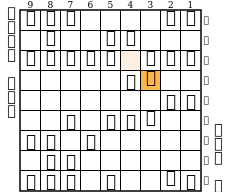

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d
1:go byoyomi 1000
1:info currmove 2e2d
1:info time 25 depth 1 nodes 4 score cp -4282 pv 2e2d
1:info currmove 4f4i
1:info time 27 depth 1 nodes 5 score cp -3269 pv 4f4i
1:info currmove 2e2d
1:info time 43 depth 2 nodes 371 score cp -2241 pv 2e2d 2i1i
1:info currmove 4f4i
1:info currmove 2e2d
1:info time 72 depth 3 nodes 14627 score cp -4232 pv 2e2d N*4g 5i5h
1:info currmove 4f4i
1:info time 89 depth 3 nodes 26491 score cp -3787 pv 4f3f S*2g 3f2f
1:info time 104 depth 3 nodes 34612 score cp -3365 pv 1i1h 3f2g+ B*3f
1:info currmove 1i1h
1:info time 157 depth 4 nodes 83222 score cp -3365 pv 1i1h 3f2g+ B*3f 2g2f
1:info currmove 2e2d
1:info time 211 depth 4 nodes 128161 score cp -2986 pv 2e2d 3d3e 4f4i 2i1i
1:info time 425 nodes 374258 score cp -2

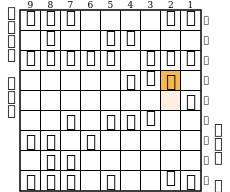

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d
2:go byoyomi 1000
2:info currmove N*4g
2:info time 0 depth 1 nodes 3 score cp 967 pv N*4g
2:info time 0 depth 1 nodes 137 score cp 1223 pv 2c2d
2:info time 0 depth 1 nodes 139 score cp 2241 pv 2i1i
2:info currmove 2i1i
2:info time 0 depth 2 nodes 369 score cp 3001 pv 2i1i 2d2c+
2:info currmove N*4g
2:info time 0 depth 2 nodes 494 score cp 4232 pv N*4g 5i5h
2:info currmove 2i1i
2:info time 17 depth 3 nodes 14990 score cp 2466 pv 2i1i 2d2c+ 3f3g+
2:info currmove N*4g
2:info time 23 depth 3 nodes 22157 score cp 2552 pv 2c2d B*1h 2i1i
2:info time 31 depth 3 nodes 30773 score cp 2986 pv 3d3e 4f4i 2i1i
2:info currmove 3d3e
2:info time 86 depth 4 nodes 73027 score cp 4042 pv 3d3e 4f4h N*4g 4h4i
2:info currmove N*4g
2:info time 501 nodes 372385

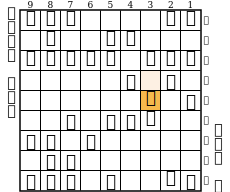

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e
1:go byoyomi 1000
1:info currmove 4f4i
1:info time 19 depth 1 nodes 4 score cp -3257 pv 4f4i
1:info currmove 4f4i
1:info currmove 4f4i
1:info time 34 depth 2 nodes 380 score cp -2986 pv 4f4i 2i1i
1:info currmove 4f4i
1:info currmove 4f4i
1:info time 60 depth 3 nodes 9139 score cp -4247 pv 4f4i N*3g 4i4h
1:info currmove 4f4i
1:info time 72 depth 3 nodes 17736 score cp -4042 pv 4f4h N*4g 4h4i
1:info currmove 4f4i
1:info time 128 depth 4 nodes 58283 score cp -3238 pv 4f4i N*3g 4i4h 2c2d
1:info currmove 4f4h
1:info time 334 nodes 264842 score cp -3238 pv 4f4i N*3g 4i4h 2c2d
1:bestmove 4f4i
47手目


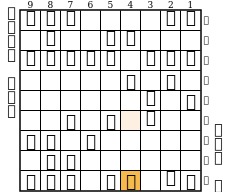

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i
2:go byoyomi 1000
2:info time 0 depth 1 nodes 138 score cp 1968 pv 2c2d
2:info time 0 depth 1 nodes 139 score cp 2986 pv 2i1i
2:info currmove 2i1i
2:info time 0 depth 2 nodes 368 score cp 3001 pv 2i1i 2d2c+
2:info time 1 depth 2 nodes 630 score cp 3045 pv 2c2d 4i2i
2:info time 1 depth 2 nodes 759 score cp 4247 pv N*3g 4i4h
2:info currmove 2i1i
2:info time 9 depth 3 nodes 9481 score cp 2256 pv 2i1i 2d2c+ 1i1h
2:info currmove N*3g
2:info time 14 depth 3 nodes 14020 score cp 3238 pv N*3g 4i4h 2c2d
2:info currmove N*3g
2:info time 53 depth 4 nodes 46481 score cp 3542 pv N*3g 4i4h S*4g 4h1h
2:info currmove N*3g
2:info time 168 depth 4 nodes 133086 score cp 4351 pv S*3h 4i4h N*4g 5i5h
2:info time 501 nodes 380642 score cp 3238 pv S*

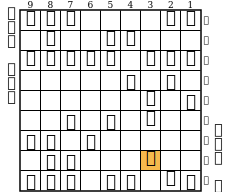

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h
1:go byoyomi 1000
1:info currmove 2d2c+
1:info time 18 depth 1 nodes 4 score cp -3752 pv 2d2c+
1:info currmove 4i4h
1:info currmove 2d2c+
1:info time 36 depth 2 nodes 316 score cp -3762 pv 2d2c+ 3h4i+
1:info currmove 4i4h
1:info time 37 depth 2 nodes 494 score cp -2181 pv 4i4h 2i1i
1:info currmove 2d2c+
1:info time 66 depth 3 nodes 12494 score cp -6077 pv 2d2c+ 3h4i+ 5i4i
1:info currmove 4i4h
1:info time 76 depth 3 nodes 19049 score cp -4172 pv 4i4h N*4g 5i5h
1:info currmove 4i4h
1:info time 124 depth 4 nodes 51991 score cp -3423 pv 4i4h 3f3g+ 4h5h 2c2d
1:info currmove 4i4h
1:info time 134 depth 4 nodes 61141 score cp -3018 pv 2d2c+ 3h4i+ 2c3c 4b3c
1:info time 275 nodes 193535 score cp -3018 pv 2d2c+ 3h4i+ 2c3c 4b3c
1:bes

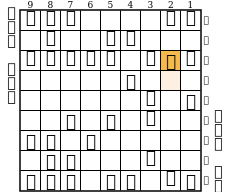

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+
2:go byoyomi 1000
2:info currmove 3h4i+
2:info time 0 depth 1 nodes 4 score cp 3762 pv 3h4i+
2:info currmove 3h4i+
2:info currmove 3h4i+
2:info time 1 depth 2 nodes 336 score cp 6059 pv 3h4i+ 5i4i
2:info currmove 3h4i+
2:info currmove 3h4i+
2:info time 11 depth 3 nodes 8045 score cp 3018 pv 3h4i+ 2c3c 4b3c
2:info currmove 3h4i+
2:info currmove 3h4i+
2:info time 38 depth 4 nodes 30986 score cp 5361 pv 3h4i+ 2c3c 4b3c 5i4i
2:info currmove 3h4i+
2:info time 200 nodes 146343 score cp 5361 pv 3h4i+ 2c3c 4b3c 5i4i
2:bestmove 3h4i+
50手目


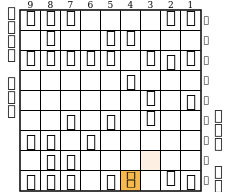

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+
1:go byoyomi 1000
1:info currmove 5i4i
1:info time 18 depth 1 nodes 4 score cp -6051 pv 5i4i
1:info currmove 2c3c
1:info currmove 5i4i
1:info time 36 depth 2 nodes 393 score cp -5308 pv 5i4i 2i1i
1:info currmove 2c3c
1:info time 37 depth 2 nodes 407 score cp -3018 pv 2c3c 4b3c
1:info currmove 5i4i
1:info time 70 depth 3 nodes 14640 score cp -6227 pv 5i4i P*4h 4i5h
1:info currmove 2c3c
1:info time 72 depth 3 nodes 15421 score cp -5361 pv 2c3c 4b3c 5i4i
1:info currmove 2c3c
1:info time 120 depth 4 nodes 45895 score cp -3231 pv 2c3c 4b3c 4d4c+ 3c4c
1:info currmove 2c3c
1:info time 354 nodes 266544 score cp -3231 pv 2c3c 4b3c 4d4c+ 3c4c
1:bestmove 2c3c
51手目


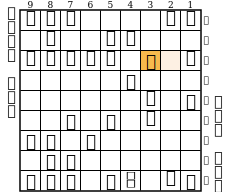

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c
2:go byoyomi 1000
2:info currmove 4b3c
2:info time 0 depth 1 nodes 4 score cp 3018 pv 4b3c
2:info currmove 4b3c
2:info currmove 4b3c
2:info time 1 depth 2 nodes 229 score cp 5361 pv 4b3c 5i4i
2:info currmove 4b3c
2:info currmove 4b3c
2:info time 11 depth 3 nodes 11098 score cp 3231 pv 4b3c 4d4c+ 3c4c
2:info currmove 4b3c
2:info currmove 4b3c
2:info time 56 depth 4 nodes 55502 score cp 5574 pv 4b3c 4d4c+ 3c4c 5i4i
2:info currmove 4b3c
2:info time 126 nodes 111946 score cp 5574 pv 4b3c 4d4c+ 3c4c 5i4i
2:bestmove 4b3c
52手目


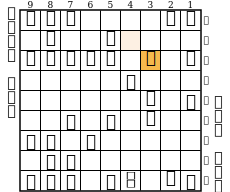

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c
1:go byoyomi 1000
1:info currmove 5i4i
1:info time 46 depth 1 nodes 4 score cp -5307 pv 5i4i
1:info currmove 4d4c+
1:info currmove 5i4i
1:info time 89 depth 2 nodes 480 score cp -5309 pv 5i4i 2i1i
1:info currmove 4d4c+
1:info time 89 depth 2 nodes 492 score cp -3231 pv 4d4c+ 3c4c
1:info currmove 5i4i
1:info time 118 depth 3 nodes 16841 score cp -5793 pv 5i4i R*4g S*5h
1:info currmove 4d4c+
1:info time 119 depth 3 nodes 17549 score cp -5574 pv 4d4c+ 3c4c 5i4i
1:info currmove 4d4c+
1:info time 154 depth 4 nodes 41241 score cp -3091 pv 4d4c+ 3c4c S*4d 4c3d
1:info currmove 4d4c+
1:info time 501 nodes 410194 score cp -5574 pv 4d4c+ 3c4c S*4d 4c3d
1:bestmove 4d4c+
53手目


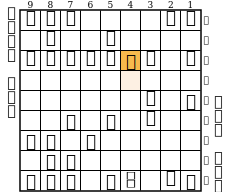

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+
2:go byoyomi 1000
2:info currmove 3c4c
2:info time 0 depth 1 nodes 4 score cp 3231 pv 3c4c
2:info currmove 3c4c
2:info currmove 3c4c
2:info time 1 depth 2 nodes 254 score cp 5574 pv 3c4c 5i4i
2:info currmove 3c4c
2:info currmove 3c4c
2:info time 22 depth 3 nodes 12772 score cp 3231 pv 3c4c P*4d 4c3b
2:info currmove 3c4c
2:info currmove 3c4c
2:info time 77 depth 4 nodes 58885 score cp 5546 pv 3c4c S*4d 4c3b 4d3e
2:info currmove 3c4c
2:info time 135 nodes 106357 score cp 5546 pv 3c4c S*4d 4c3b 4d3e
2:bestmove 3c4c
54手目


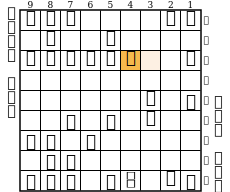

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c
1:go byoyomi 1000
1:info currmove 5i4i
1:info time 45 depth 1 nodes 4 score cp -5520 pv 5i4i
1:info currmove S*4d
1:info currmove 5i4i
1:info time 80 depth 2 nodes 507 score cp -4290 pv 5i4i 2a3c
1:info currmove S*4d
1:info time 80 depth 2 nodes 519 score cp -3291 pv S*4d 4c3d
1:info time 80 depth 2 nodes 791 score cp -3231 pv P*4d 4c3b
1:info currmove 5i4i
1:info time 122 depth 3 nodes 18352 score cp -6006 pv 5i4i R*4g S*5h
1:info currmove P*4d
1:info time 124 depth 3 nodes 19057 score cp -5574 pv P*4d 4c3b 5i4i
1:info time 141 depth 3 nodes 35724 score cp -5546 pv S*4d 4c3b 4d3e
1:info currmove S*4d
1:info time 178 depth 4 nodes 67489 score cp -3301 pv S*4d 4c3b P*3c 2a3c
1:info currmove

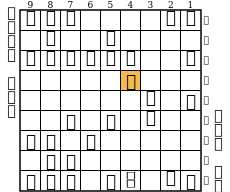

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d
2:go byoyomi 1000
2:info currmove 4c3d
2:info time 0 depth 1 nodes 4 score cp 3291 pv 4c3d
2:info currmove 4c3b
2:info currmove 4c3d
2:info time 1 depth 2 nodes 173 score cp 5536 pv 4c3d 4d3e
2:info currmove 4c3b
2:info time 1 depth 2 nodes 326 score cp 5546 pv 4c3b 4d3e
2:info currmove 4c3d
2:info time 11 depth 3 nodes 8248 score cp 2881 pv 4c3d 4d3e 3d3e
2:info currmove 4c3b
2:info time 20 depth 3 nodes 15927 score cp 3301 pv 4c3b P*3c 2a3c
2:info currmove 4c3b
2:info time 77 depth 4 nodes 69249 score cp 5327 pv 4c3b 4d3e 4i5i 8h1a+
2:info currmove 4c3b
2:info time 113 nodes 101471 score cp 5327 pv 4c3b 4d3e 4i5i 8h1a+
2:bestmove 4c3b
56手目


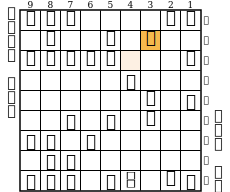

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b
1:go byoyomi 1000
1:info currmove 4d3e
1:info time 34 depth 1 nodes 4 score cp -5546 pv 4d3e
1:info currmove P*3c
1:info currmove 4d3e
1:info time 66 depth 2 nodes 417 score cp -4106 pv 4d3e 4i5i
1:info currmove P*3c
1:info time 66 depth 2 nodes 433 score cp -3301 pv P*3c 2a3c
1:info currmove 4d3e
1:info time 109 depth 3 nodes 17663 score cp -5327 pv 4d3e 4i5i 8h1a+
1:info currmove P*3c
1:info currmove 4d3e
1:info time 155 depth 4 nodes 69043 score cp -4167 pv 4d3e 4i5i G*2b 3b4b
1:info currmove P*3c
1:info time 382 depth 4 nodes 280281 score cp -3987 pv B*6e 3b2c 4d3e 4i5i
1:info time 459 nodes 347832 score cp -3987 pv B*6e 3b2c 4d3e 4i5i
1:bestmove B*6e
57手目


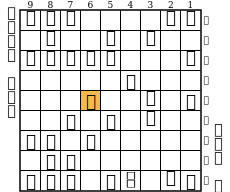

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e
2:go byoyomi 1000
2:info currmove N*4c
2:info time 0 depth 1 nodes 4 score cp 3356 pv N*4c
2:info currmove N*4c
2:info currmove N*4c
2:info time 1 depth 2 nodes 115 score cp 5601 pv N*4c 4d3e
2:info currmove N*4c
2:info time 1 depth 2 nodes 223 score cp 5644 pv 3b2b 4d3e
2:info currmove 3b2b
2:info time 8 depth 3 nodes 5112 score cp 934 pv 3b2b 4d3e 2a3c
2:info currmove N*4c
2:info time 13 depth 3 nodes 8088 score cp 3566 pv N*4c P*3c 2a3c
2:info time 35 depth 3 nodes 18546 score cp 3987 pv 3b2c 4d3e 4i5i
2:info currmove 3b2b
2:info time 46 depth 4 nodes 26855 score cp 3296 pv 3b2b 4d3e 2a3c 5i4i
2:info currmove 3b2c
2:info time 65 depth 4 nodes 45474 score cp 5217 pv 3b2c 4

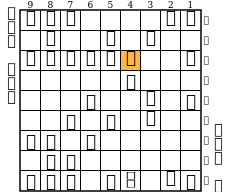

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c
1:go byoyomi 1000
1:info currmove P*3c
1:info time 41 depth 1 nodes 3 score cp -8056 pv P*3c
1:info time 41 depth 1 nodes 59 score cp -5645 pv 5i4i
1:info time 41 depth 1 nodes 66 score cp -5601 pv 4d3e
1:info currmove 4d3e
1:info time 73 depth 2 nodes 267 score cp -4161 pv 4d3e 4i5i
1:info currmove P*3c
1:info time 73 depth 2 nodes 283 score cp -3566 pv P*3c 2a3c
1:info currmove 4d3e
1:info time 108 depth 3 nodes 8314 score cp -6202 pv 4d3e 4i5i 8h1a+
1:info currmove P*3c
1:info time 108 depth 3 nodes 8590 score cp -5811 pv P*3c 2a3c 4d3e
1:info time 117 depth 3 nodes 16819 score cp -5703 pv 5i4i P*4h 4d3e
1:info currmove 5i4i
1:info time 160 depth 4 nodes 45913 score 

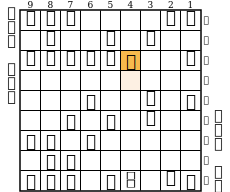

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c
2:go byoyomi 1000
2:info currmove 5b4c
2:info time 0 depth 1 nodes 4 score cp 3946 pv 5b4c
2:info currmove 5b4c
2:info currmove 5b4c
2:info time 0 depth 2 nodes 163 score cp 6217 pv 5b4c 5i4i
2:info currmove 5b4c
2:info currmove 5b4c
2:info time 16 depth 3 nodes 8218 score cp 3977 pv 5b4c N*2d 3b4b
2:info currmove 5b4c
2:info currmove 5b4c
2:info time 40 depth 4 nodes 33241 score cp 6321 pv 5b4c N*2d 3b4b 5i4i
2:info currmove 5b4c
2:info time 79 nodes 63628 score cp 6321 pv 5b4c N*2d 3b4b 5i4i
2:bestmove 5b4c
60手目


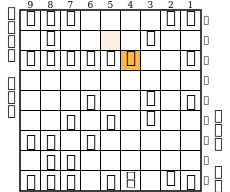

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c
1:go byoyomi 1000
1:info currmove N*2d
1:info time 47 depth 1 nodes 3 score cp -8691 pv N*2d
1:info time 48 depth 1 nodes 97 score cp -6235 pv 5i4i
1:info currmove 5i4i
1:info time 86 depth 2 nodes 421 score cp -5005 pv 5i4i 2a3c
1:info currmove N*2d
1:info time 87 depth 2 nodes 433 score cp -3977 pv N*2d 3b4b
1:info currmove 5i4i
1:info time 131 depth 3 nodes 16910 score cp -6721 pv 5i4i R*4g S*5h
1:info currmove N*2d
1:info time 133 depth 3 nodes 17186 score cp -6321 pv N*2d 3b4b 5i4i
1:info currmove N*2d
1:info time 152 depth 4 nodes 31261 score cp -4617 pv N*2d 3b4b 6e4c+ 4b4c
1:info currmove N*2d
1:info time 316 depth 4 nodes 186775 score cp -4445 pv 6e4c

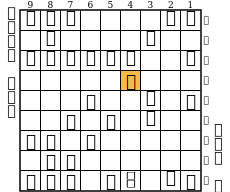

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d
2:go byoyomi 1000
2:info currmove 4i5i
2:info time 1 depth 1 nodes 4 score cp 5076 pv 4i5i
2:info currmove 4i5i
2:info currmove 4i5i
2:info time 3 depth 2 nodes 393 score cp 6331 pv 4i5i 4d4c+
2:info currmove 4i5i
2:info time 4 depth 2 nodes 666 score cp 7426 pv 4c5d 6e5d
2:info currmove 4i5i
2:info time 18 depth 3 nodes 16516 score cp 3667 pv 4i5i 4d4c+ 3b3a
2:info currmove 4c5d
2:info time 26 depth 3 nodes 23765 score cp 3979 pv 4c5d N*2d 3b2b
2:info currmove 4c5d
2:info time 41 depth 4 nodes 35421 score cp 7069 pv 4c5d N*2d 3b2b 6e5d
2:info currmove 4c5d
2:info time 237 nodes 226926 score cp 7069 pv 4c5d N*2d 3b2b 6e5d
2:bestmove 4c5d
62手目


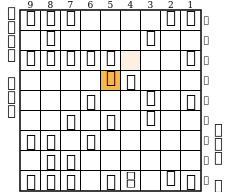

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d
1:go byoyomi 1000
1:info currmove N*2d
1:info time 4 depth 1 nodes 3 score cp -9911 pv N*2d
1:info time 4 depth 1 nodes 71 score cp -8685 pv 5i4i
1:info time 5 depth 1 nodes 72 score cp -7426 pv 6e5d
1:info currmove 6e5d
1:info time 9 depth 2 nodes 143 score cp -5177 pv 6e5d 5c5d
1:info currmove N*2d
1:info time 10 depth 2 nodes 159 score cp -3979 pv N*2d 3b2b
1:info currmove 6e5d
1:info time 14 depth 3 nodes 1438 score cp -7476 pv 6e5d 5c5d 5i4i
1:info currmove N*2d
1:info time 16 depth 3 nodes 1684 score cp -7069 pv N*2d 3b2b 6e5d
1:info currmove N*2d
1:info time 45 depth 4 nodes 24811 score cp -5403 pv N*2d 3b3a 6e5d 4i5i
1:info currmove N*2d
1:in

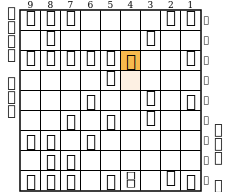

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+
2:go byoyomi 1000
2:info currmove 3b4c
2:info time 0 depth 1 nodes 4 score cp 4146 pv 3b4c
2:info currmove 3b4c
2:info currmove 3b4c
2:info time 3 depth 2 nodes 138 score cp 7636 pv 3b4c 6e5d
2:info currmove 3b4c
2:info currmove 3b4c
2:info time 12 depth 3 nodes 7977 score cp 4191 pv 3b4c N*5e 4c3b
2:info currmove 3b4c
2:info currmove 3b4c
2:info time 20 depth 4 nodes 14205 score cp 7681 pv 3b4c N*5e 4c3b 6e5d
2:info currmove 3b4c
2:info time 64 nodes 56223 score cp 7681 pv 3b4c N*5e 4c3b 6e5d
2:bestmove 3b4c
64手目


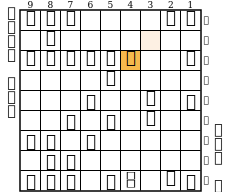

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c
1:go byoyomi 1000
1:info currmove N*5e
1:info time 3 depth 1 nodes 3 score cp -10121 pv N*5e
1:info time 4 depth 1 nodes 76 score cp -8895 pv 5i4i
1:info time 4 depth 1 nodes 77 score cp -7636 pv 6e5d
1:info currmove 6e5d
1:info time 7 depth 2 nodes 140 score cp -5387 pv 6e5d 5c5d
1:info currmove N*5e
1:info time 7 depth 2 nodes 156 score cp -4191 pv N*5e 4c3b
1:info currmove 6e5d
1:info time 12 depth 3 nodes 1093 score cp -7748 pv 6e5d 4c5d 5i4i
1:info currmove N*5e
1:info time 13 depth 3 nodes 1325 score cp -7681 pv N*5e 4c3b 6e5d
1:info currmove N*5e
1:info time 39 depth 4 nodes 11316 score cp -5432 pv N*5e 4c3b 6e5d 5c5d
1:info currmov

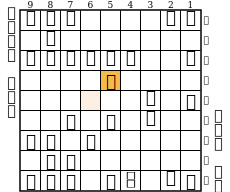

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d
2:go byoyomi 1000
2:info currmove 5c5d
2:info time 0 depth 1 nodes 4 score cp 5387 pv 5c5d
2:info currmove 5c5d
2:info currmove 5c5d
2:info time 0 depth 2 nodes 213 score cp 7676 pv 5c5d 5i4i
2:info currmove 5c5d
2:info time 0 depth 2 nodes 415 score cp 7748 pv 4c5d 5i4i
2:info currmove 4c5d
2:info time 17 depth 3 nodes 15410 score cp 5384 pv 4c5d 5f5e 5d6e
2:info currmove 5c5d
2:info time 32 depth 3 nodes 30663 score cp 5467 pv 5c5d G*4d 4c3b
2:info currmove 4c5d
2:info time 69 depth 4 nodes 73555 score cp 7746 pv 4c5d 5f5e 5d6e 5i4i
2:info currmove 5c5d
2:info time 111 depth 4 nodes 114168 score cp 7842 pv 5c5d G*4d 4c3b 5i4i
2:info

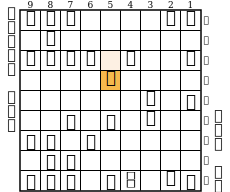

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d
1:go byoyomi 1000
1:info currmove 5i4i
1:info time 5 depth 1 nodes 4 score cp -7676 pv 5i4i
1:info currmove G*4d
1:info currmove 5i4i
1:info time 11 depth 2 nodes 571 score cp -6446 pv 5i4i 8b1b
1:info currmove G*4d
1:info time 12 depth 2 nodes 581 score cp -5467 pv G*4d 4c3b
1:info currmove 5i4i
1:info time 51 depth 3 nodes 27807 score cp -8162 pv 5i4i R*4g S*5h
1:info currmove G*4d
1:info time 52 depth 3 nodes 28072 score cp -7842 pv G*4d 4c3b 5i4i
1:info currmove G*4d
1:info time 103 depth 4 nodes 70992 score cp -7629 pv G*4d 4c5b 5i4i 2i1i
1:info currmove G*4d
1:info time 231 depth 4 nodes 192834 score cp -6932 pv 5i4i B*4f S

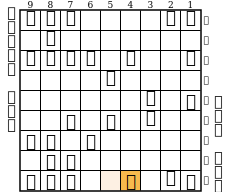

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i
2:go byoyomi 1000
2:info currmove 8b1b
2:info time 10 depth 1 nodes 4 score cp 5377 pv 8b1b
2:info currmove R*4g
2:info currmove 8b1b
2:info time 20 depth 2 nodes 652 score cp 5378 pv 8b1b 1i1h
2:info currmove R*4g
2:info time 21 depth 2 nodes 921 score cp 6508 pv R*4g 8h1a+
2:info time 22 depth 2 nodes 1535 score cp 6519 pv B*4f 7i6i
2:info time 22 depth 2 nodes 1813 score cp 6612 pv P*4h 4i5h
2:info currmove 8b1b
2:info time 51 depth 3 nodes 23706 score cp 3986 pv 8b1b N*2d 2i1i
2:info currmove P*4h
2:info time 71 depth 3 nodes 43780 score cp 5037 pv P*4h S*4d 4c3d
2:info time 93 depth 3 nodes 70259 score cp 5187 pv 2i1i 8

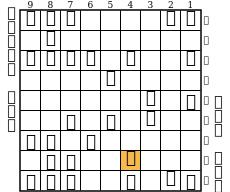

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h
1:go byoyomi 1000
1:info currmove 4i5h
1:info time 39 depth 1 nodes 4 score cp -6612 pv 4i5h
1:info currmove 4i5h
1:info currmove 4i5h
1:info time 61 depth 2 nodes 636 score cp -5191 pv 4i5h 2i1i
1:info currmove 4i5h
1:info time 65 depth 2 nodes 3546 score cp -5037 pv S*4d 4c3d
1:info currmove 4i5h
1:info time 124 depth 3 nodes 46219 score cp -6557 pv 4i5h R*4i N*6i
1:info currmove S*4d
1:info time 126 depth 3 nodes 46857 score cp -6552 pv S*4d 4c3b 4d3e
1:info currmove S*4d
1:info time 173 depth 4 nodes 96691 score cp -3607 pv S*4d 4c3d 4d3e 3d3e
1:info currmove S*4d
1:info time 501 nodes 453915 score cp -6552 pv S*4d 

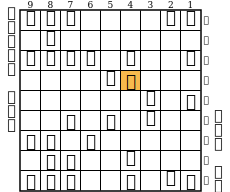

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d
2:go byoyomi 1000
2:info currmove 4c3d
2:info time 0 depth 1 nodes 4 score cp 5037 pv 4c3d
2:info currmove 4c3b
2:info currmove 4c3d
2:info time 1 depth 2 nodes 210 score cp 6542 pv 4c3d 4d3e
2:info currmove 4c3b
2:info time 1 depth 2 nodes 404 score cp 6552 pv 4c3b 4d3e
2:info currmove 4c3d
2:info time 19 depth 3 nodes 14499 score cp 3607 pv 4c3d 4d3e 3d3e
2:info currmove 4c3b
2:info currmove 4c3d
2:info time 41 depth 4 nodes 35460 score cp 6262 pv 4c3d 4d3e 3d3e 4i5h
2:info currmove 4c3b
2:info time 76 depth 4 nodes 71754 score cp 6464 pv 4c3b 4d3e B*5g 7i6i
2:info time 102 nodes 101899 score cp 6464 pv 4c3b 4d3e

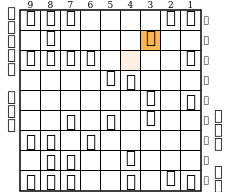

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b
1:go byoyomi 1000
1:info currmove 4d3e
1:info time 34 depth 1 nodes 4 score cp -6552 pv 4d3e
1:info currmove G*4c
1:info currmove 4d3e
1:info time 57 depth 2 nodes 524 score cp -5107 pv 4d3e 4h4i+
1:info currmove G*4c
1:info time 58 depth 2 nodes 534 score cp -3075 pv G*4c 3b2b
1:info time 60 depth 2 nodes 1303 score cp -3040 pv N*2d 3b2b
1:info currmove 4d3e
1:info time 102 depth 3 nodes 27775 score cp -6464 pv 4d3e B*5g 7i6i
1:info currmove N*2d
1:info currmove 4d3e
1:info time 161 depth 4 nodes 92336 score cp -5138 pv 4d3e 4h4i+ N*2d 3b3a
1:info currmove N*2d
1:info time 501 nodes 402932 score cp -6464 pv 4

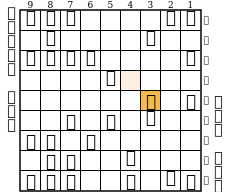

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e
2:go byoyomi 1000
2:info time 6 depth 1 nodes 201 score cp 5107 pv 4h4i+
2:info currmove 4h4i+
2:info time 15 depth 2 nodes 525 score cp 6328 pv 4h4i+ 8h1a+
2:info time 16 depth 2 nodes 754 score cp 6464 pv B*5g 7i6i
2:info currmove 4h4i+
2:info time 38 depth 3 nodes 20043 score cp 5138 pv 4h4i+ N*2d 3b3a
2:info currmove B*5g
2:info currmove 4h4i+
2:info time 113 depth 4 nodes 103146 score cp 5951 pv 4h4i+ N*2d 3b4b 8h1a+
2:info currmove B*5g
2:info time 169 depth 4 nodes 142686 score cp 6905 pv B*5g G*6h 5g6h+ 7h6h
2:info time 501 nodes 515222 score cp 5138 pv B*5g G*6h 5g6h+ 7h6h
2:bestmove B*5g
72手目


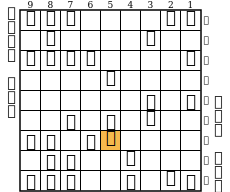

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g
1:go byoyomi 1000
1:info currmove 7i6i
1:info time 0 depth 1 nodes 4 score cp -6464 pv 7i6i
1:info currmove 7h6h
1:info currmove 7i6i
1:info time 1 depth 2 nodes 278 score cp -5019 pv 7i6i 4h4i+
1:info currmove 7h6h
1:info time 1 depth 2 nodes 544 score cp -3740 pv 7h6h 5g3e+
1:info currmove 7i6i
1:info time 15 depth 3 nodes 13611 score cp -7260 pv 7i6i 4h4i+ 8h1a+
1:info currmove 7h6h
1:info time 30 depth 3 nodes 26938 score cp -6608 pv 7h6h 5g6h+ 7i6h
1:info time 44 depth 3 nodes 40051 score cp -6452 pv G*6h 5g3e+ 4i5h
1:info currmove 7h6h
1:info time 77 depth 4 nodes 71472 score cp -5586 pv 7h6h 5

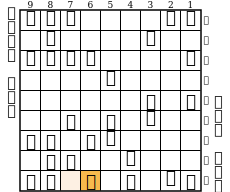

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i
2:go byoyomi 1000
2:info currmove 4h4i+
2:info time 8 depth 1 nodes 4 score cp 5019 pv 4h4i+
2:info currmove 4h4i+
2:info currmove 4h4i+
2:info time 15 depth 2 nodes 465 score cp 7260 pv 4h4i+ 8h1a+
2:info currmove 4h4i+
2:info currmove 4h4i+
2:info time 39 depth 3 nodes 17238 score cp 5050 pv 4h4i+ N*2d 3b3a
2:info currmove 4h4i+
2:info currmove 4h4i+
2:info time 115 depth 4 nodes 61870 score cp 6883 pv 4h4i+ N*2d 3b4b 8h1a+
2:info currmove 4h4i+
2:info time 501 nodes 419802 score cp 5050 pv 4h4i+ N*2d 3b4b 8h1a+
2:bestmove 4h4i+
74手目


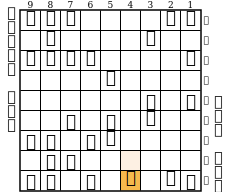

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+
1:go byoyomi 1000
1:info currmove 8h1a+
1:info time 36 depth 1 nodes 4 score cp -7260 pv 8h1a+
1:info currmove N*2d
1:info currmove 8h1a+
1:info time 71 depth 2 nodes 585 score cp -7265 pv 8h1a+ 5g3e+
1:info currmove N*2d
1:info time 71 depth 2 nodes 599 score cp -5050 pv N*2d 3b3a
1:info currmove 8h1a+
1:info time 108 depth 3 nodes 5211 score mate - pv 8h1a+ G*5i G*4f
1:info currmove N*2d
1:info time 109 depth 3 nodes 5741 score cp -6883 pv N*2d 3b4b 8h1a+
1:info currmove N*2d
1:info time 185 depth 4 nodes 52675 score cp -5265 pv N*2d 3b3a 8h4d 2i1i
1:info currmove N*2d
1:info time 501 no

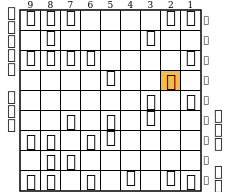

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ N*2d
2:go byoyomi 1000
2:info currmove 3b4b
2:info time 0 depth 1 nodes 4 score cp 5050 pv 3b4b
2:info currmove 3b3a
2:info currmove 3b4b
2:info time 1 depth 2 nodes 154 score cp 7291 pv 3b4b 8h1a+
2:info currmove 3b4b
2:info currmove 3b4b
2:info time 13 depth 3 nodes 11253 score cp 5112 pv 3b4b G*3b 4b5a
2:info currmove 3b4b
2:info time 25 depth 3 nodes 22333 score cp 5469 pv 3b3a 8h4d 2i1i
2:info currmove 3b3a
2:info time 75 depth 4 nodes 66479 score cp 6650 pv 3b3a G*3b 8b3b 2d3b+
2:info currmove 3b4b
2:info time 91 depth 4 nodes 80338 score cp 6742 pv 3b4b G*3b 4b5b 8h1a+
2:info time 1

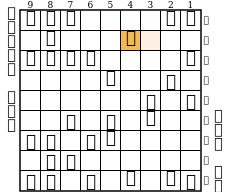

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ N*2d 3b4b
1:go byoyomi 1000
1:info currmove 8h1a+
1:info time 46 depth 1 nodes 4 score cp -7291 pv 8h1a+
1:info currmove G*3b
1:info currmove 8h1a+
1:info time 70 depth 2 nodes 510 score cp -5861 pv 8h1a+ 5g3e+
1:info currmove G*3b
1:info time 70 depth 2 nodes 522 score cp -5112 pv G*3b 4b5a
1:info currmove 8h1a+
1:info time 98 depth 3 nodes 5615 score mate - pv 8h1a+ G*5i 1a2a
1:info currmove G*3b
1:info time 99 depth 3 nodes 6084 score cp -6742 pv G*3b 4b5b 8h1a+
1:info currmove G*3b
1:info time 130 depth 4 nodes 33482 score cp -4769 pv G*3b 4b5a G*4a 5a6b
1:info currmove G*3b
1:info tim

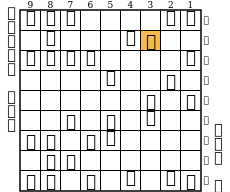

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ N*2d 3b4b G*3b
2:go byoyomi 1000
2:info currmove 4b5a
2:info time 0 depth 1 nodes 4 score cp 5112 pv 4b5a
2:info currmove 4b5b
2:info currmove 4b5a
2:info time 0 depth 2 nodes 161 score cp 7358 pv 4b5a 8h1a+
2:info currmove 4b5b
2:info currmove 4b5a
2:info time 23 depth 3 nodes 12153 score cp 5179 pv 4b5a G*4a 5a6a
2:info currmove 4b5a
2:info currmove 4b5a
2:info time 62 depth 4 nodes 36479 score cp 6810 pv 4b5a G*4a 5a6b 8h1a+
2:info currmove 4b5a
2:info time 77 nodes 48956 score cp 6810 pv 4b5a G*4a 5a6b 8h1a+
2:bestmove 4b5a
78手目


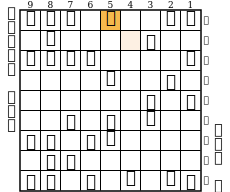

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ N*2d 3b4b G*3b 4b5a
1:go byoyomi 1000
1:info currmove 8h1a+
1:info time 6 depth 1 nodes 4 score cp -7358 pv 8h1a+
1:info currmove G*4a
1:info currmove 8h1a+
1:info time 20 depth 2 nodes 502 score cp -5928 pv 8h1a+ 5g3e+
1:info currmove G*4a
1:info time 22 depth 2 nodes 512 score cp -5179 pv G*4a 5a6b
1:info currmove 8h1a+
1:info time 44 depth 3 nodes 4970 score mate - pv 8h1a+ G*5i 3b2a
1:info currmove G*4a
1:info time 46 depth 3 nodes 5133 score cp -6810 pv G*4a 5a6b 8h1a+
1:info currmove G*4a
1:info time 94 depth 4 nodes 29752 score cp -5377 pv G*4a 5a6a 8h1a+ 5g3e+
1:info currmove G*4a


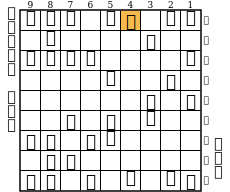

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ N*2d 3b4b G*3b 4b5a G*4a
2:go byoyomi 1000
2:info currmove 5a6b
2:info time 0 depth 1 nodes 4 score cp 5179 pv 5a6b
2:info currmove 5a6a
2:info currmove 5a6b
2:info time 2 depth 2 nodes 89 score cp 7425 pv 5a6b 8h1a+
2:info currmove 5a6b
2:info currmove 5a6b
2:info time 19 depth 3 nodes 6664 score cp 5179 pv 5a6b 8h4d 6b6a
2:info currmove 5a6b
2:info time 34 depth 3 nodes 13558 score cp 5995 pv 5a6a 8h1a+ 5g3e+
2:info currmove 5a6a
2:info time 63 depth 4 nodes 38738 score cp 8865 pv 5a6a 8h7g 5g3e+ 7g1a+
2:info currmove 5a6b
2:info time 108 nodes 78709 score cp 8865 pv 5a6a 8h7g 5g3e+ 7g1a

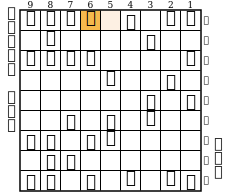

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ N*2d 3b4b G*3b 4b5a G*4a 5a6a
1:go byoyomi 1000
1:info currmove 8h1a+
1:info time 0 depth 1 nodes 4 score cp -7425 pv 8h1a+
1:info currmove 8h1a+
1:info currmove 8h1a+
1:info time 1 depth 2 nodes 421 score cp -5995 pv 8h1a+ 5g3e+
1:info currmove 8h1a+
1:info currmove 8h1a+
1:info time 4 depth 3 nodes 3101 score mate - pv 8h1a+ G*5i 3b2a
1:info currmove 8h1a+
1:info time 67 depth 3 nodes 29192 score cp -8878 pv 7h6h 5g3e+ 8h1a+
1:info time 84 depth 3 nodes 39866 score cp -8865 pv 8h7g 5g3e+ 7g1a+
1:info currmove 8h1a+
1:info time 109 depth 4 nodes 56227 score mate - pv 8h1a+ G*5i L*2c 3e2d


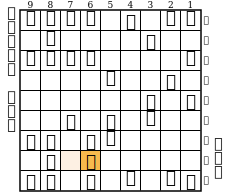

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ N*2d 3b4b G*3b 4b5a G*4a 5a6a 7h6h
2:go byoyomi 1000
2:info time 101 depth 1 nodes 215 score cp 7447 pv 5g3e+
2:info currmove 5g3e+
2:info time 102 depth 2 nodes 425 score cp 8878 pv 5g3e+ 8h1a+
2:info currmove 5g3e+
2:info time 117 depth 3 nodes 7701 score cp 7443 pv 5g3e+ 8h1a+ 3e2d
2:info currmove 5g3e+
2:info currmove 5g3e+
2:info time 181 depth 4 nodes 58669 score cp 8802 pv 5g3e+ 8h1a+ G*5i 6i7h
2:info currmove 5g3e+
2:info time 301 depth 4 nodes 179089 score cp 9194 pv R*5i 6i7h 5g6h+ 7h6h
2:info time 501 nodes 339571 score cp 7443 pv R*5i 6i7h 5g6h+ 7h6h
2:bestmove R*5i
82手目


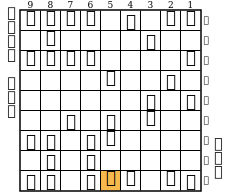

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ N*2d 3b4b G*3b 4b5a G*4a 5a6a 7h6h R*5i
1:go byoyomi 1000
1:info currmove 6i7h
1:info time 0 depth 1 nodes 4 score cp -8801 pv 6i7h
1:info currmove 6i7h
1:info currmove 6i7h
1:info time 1 depth 2 nodes 286 score cp -7356 pv 6i7h 5g3e+
1:info currmove 6i7h
1:info currmove 6i7h
1:info time 8 depth 3 nodes 4899 score cp -8787 pv 6i7h 5g3e+ 8h1a+
1:info currmove 6i7h
1:info currmove 6i7h
1:info time 43 depth 4 nodes 34390 score cp -7352 pv 6i7h 5g3e+ 8h1a+ 3e2d
1:info currmove 6i7h
1:info time 44 nodes 34392 score cp -7352 pv 6i7h 5g3e+ 8h1a+ 3e2d
1:bestmove 6i7h
83手目


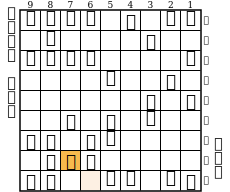

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ N*2d 3b4b G*3b 4b5a G*4a 5a6a 7h6h R*5i 6i7h
2:go byoyomi 1000
2:info currmove 5g6h+
2:info time 81 depth 1 nodes 3 score cp 5322 pv 5g6h+
2:info time 81 depth 1 nodes 174 score cp 7356 pv 5g3e+
2:info currmove 5g3e+
2:info time 101 depth 2 nodes 347 score cp 8787 pv 5g3e+ 8h1a+
2:info currmove 5g6h+
2:info currmove 5g3e+
2:info time 108 depth 3 nodes 5688 score cp 7352 pv 5g3e+ 8h1a+ 3e2d
2:info currmove 5g3e+
2:info currmove 5g3e+
2:info time 155 depth 4 nodes 42113 score cp 9000 pv 5g3e+ 8h1a+ 3e6h 7h6h
2:info currmove 5g3e+
2:info time 501 nodes 353203 score cp 7352 pv 5g3e+ 8h1a+ 3e6h

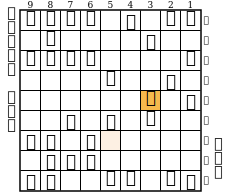

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ N*2d 3b4b G*3b 4b5a G*4a 5a6a 7h6h R*5i 6i7h 5g3e+
1:go byoyomi 1000
1:info currmove 8h1a+
1:info time 0 depth 1 nodes 4 score cp -8787 pv 8h1a+
1:info currmove 8h1a+
1:info currmove 8h1a+
1:info time 1 depth 2 nodes 365 score cp -7352 pv 8h1a+ 3e2d
1:info currmove 8h1a+
1:info currmove 8h1a+
1:info time 25 depth 3 nodes 10451 score cp -9617 pv 8h1a+ 3e6h 7h6h
1:info currmove 8h1a+
1:info currmove 8h1a+
1:info time 81 depth 4 nodes 61764 score cp -8377 pv 8h1a+ 3e6h 7h6h 5i8i+
1:info currmove 8h1a+
1:info time 189 nodes 168261 score cp -8377 pv 8h1a+ 3e6h 7h6h 5i8i+
1:bestmove 8h1a+
85手目


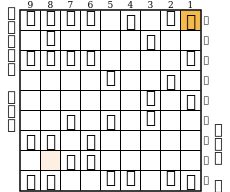

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ N*2d 3b4b G*3b 4b5a G*4a 5a6a 7h6h R*5i 6i7h 5g3e+ 8h1a+
2:go byoyomi 1000
2:info currmove 3e2d
2:info time 101 depth 1 nodes 4 score cp 7352 pv 3e2d
2:info currmove 3e6h
2:info currmove 3e2d
2:info time 102 depth 2 nodes 440 score cp 8582 pv 3e2d 1a2a
2:info currmove 3e6h
2:info time 102 depth 2 nodes 448 score cp 9617 pv 3e6h 7h6h
2:info currmove 3e2d
2:info time 116 depth 3 nodes 13525 score cp 7382 pv 3e2d L*2f 2d6h
2:info currmove 3e6h
2:info time 116 depth 3 nodes 13986 score cp 8377 pv 3e6h 7h6h 5i8i+
2:info currmove 3e6h
2:info time 180 depth 4 nodes 62150 score cp 9751 pv 3e6h 7h6

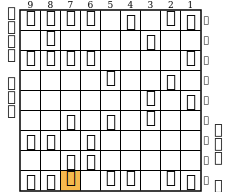

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ N*2d 3b4b G*3b 4b5a G*4a 5a6a 7h6h R*5i 6i7h 5g3e+ 8h1a+ G*7i
1:go byoyomi 1000
1:info currmove 7h7g
1:info time 0 depth 1 nodes 4 score cp -8735 pv 7h7g
1:info currmove 7h7g
1:info currmove 7h7g
1:info time 1 depth 2 nodes 224 score cp -7300 pv 7h7g 7i8i
1:info currmove 7h7g
1:info currmove 7h7g
1:info time 17 depth 3 nodes 7604 score cp -9366 pv 7h7g 3e6h 7g6h
1:info currmove 7h7g
1:info currmove 7h7g
1:info time 45 depth 4 nodes 39875 score cp -8162 pv 7h7g 7i8i L*2c 3e2d
1:info currmove 7h7g
1:info time 54 nodes 48420 score cp -8162 pv 7h7g 7i8i L*2c 3e2d
1:bestmove 7h7g
87手目


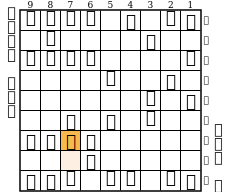

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ N*2d 3b4b G*3b 4b5a G*4a 5a6a 7h6h R*5i 6i7h 5g3e+ 8h1a+ G*7i 7h7g
2:go byoyomi 1000
2:info time 0 nodes 0 score mate + pv 3e6h
2:bestmove 3e6h
88手目


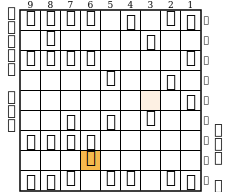

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ N*2d 3b4b G*3b 4b5a G*4a 5a6a 7h6h R*5i 6i7h 5g3e+ 8h1a+ G*7i 7h7g 3e6h
1:go byoyomi 1000
1:info currmove 7g6h
1:info time 0 depth 1 nodes 4 score cp -8536 pv 7g6h
1:info currmove 7g6h
1:info currmove 7g6h
1:info time 1 depth 2 nodes 291 score cp -7100 pv 7g6h 7i8i
1:info currmove 7g6h
1:info currmove 7g6h
1:info time 3 depth 3 nodes 1505 score mate - pv 7g6h G*7h 6h7i
1:info currmove 7g6h
1:info time 13 depth 3 nodes 11040 score cp -11386 pv 7g6f 5i5g+ 6f6e
1:info currmove 7g6h
1:info time 31 depth 4 nodes 28654 score mate - pv 7g6h G*7h B*3d 6a7b
1:info currmove 7g6f
1:info time 88 depth

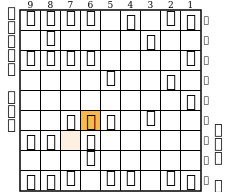

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ N*2d 3b4b G*3b 4b5a G*4a 5a6a 7h6h R*5i 6i7h 5g3e+ 8h1a+ G*7i 7h7g 3e6h 7g6f
2:go byoyomi 1000
2:info time 0 nodes 0 score mate + pv 5i5g+
2:bestmove 5i5g+
90手目


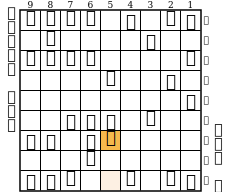

1:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ N*2d 3b4b G*3b 4b5a G*4a 5a6a 7h6h R*5i 6i7h 5g3e+ 8h1a+ G*7i 7h7g 3e6h 7g6f 5i5g+
1:go byoyomi 1000
1:info currmove 6f6e
1:info time 1 depth 1 nodes 4 score cp -11362 pv 6f6e
1:info currmove 6f6e
1:info currmove 6f6e
1:info time 1 depth 2 nodes 310 score cp -9927 pv 6f6e 7i8i
1:info currmove 6f6e
1:info currmove 6f6e
1:info time 6 depth 3 nodes 1247 score mate - pv 6f6e G*6d 1a2a
1:info currmove 6f6e
1:info currmove 6f6e
1:info time 23 depth 4 nodes 14172 score mate - pv 6f6e G*6d 1i1h 8i9i
1:info time 33 nodes 24430 score mate - pv 6f6e G*6d 1i1h 8i9i
1:bestmove 6f6e
91手目


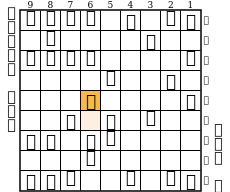

2:position startpos moves 6i7h 4a3b 4i5h 5a4b 5i6h 3c3d 1g1f 6a5b 1f1e 2b3c 2g2f 3a2b 2f2e 3d3e 4g4f 3c5e 4f4e 3e3f 5g5f 5e4f 6h6i 3f3g+ 2h2f 3g4g 5h5i P*3g 2f2g 3g3h+ 2g4g 4f7i+ 6i7i 3h2i 7g7f 2i3i 4e4d S*3f 4g4f 3i2i P*3c 2b3c 4d4c 3b4c P*4d 4c3d 2e2d 3d3e 4f4i S*3h 2d2c+ 3h4i+ 2c3c 4b3c 4d4c+ 3c4c S*4d 4c3b B*6e N*4c 4d4c 5b4c P*4d 4c5d 4d4c+ 3b4c 6e5d 5c5d 5i4i P*4h S*4d 4c3b 4d3e B*5g 7i6i 4h4i+ N*2d 3b4b G*3b 4b5a G*4a 5a6a 7h6h R*5i 6i7h 5g3e+ 8h1a+ G*7i 7h7g 3e6h 7g6f 5i5g+ 6f6e
2:go byoyomi 1000
2:info time 0 nodes 0 score mate + pv G*6d
2:bestmove G*6d
92手目


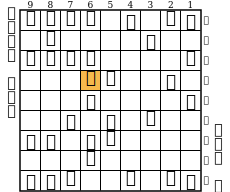

1:quit
2:quit
まで92手で後手の勝ち
1 of 1 games finished.
Lesserkai 1.4.2 vs Lesserkai 1.4.2: 0-1-0 (0.0%)
Black vs White: 0-1-0 (0.0%)
Lesserkai 1.4.2 playing Black: 0-1-0 (0.0%)
Lesserkai 1.4.2 playing White: 0-0-0 (0.0%)
Lesserkai 1.4.2 playing Black: 0-0-0 (0.0%)
Lesserkai 1.4.2 playing White: 1-0-0 (100.0%)


{'black_won': 0,
 'draw': 0,
 'engine1_name': 'Lesserkai 1.4.2',
 'engine1_won': 0,
 'engine2_name': 'Lesserkai 1.4.2',
 'engine2_won': 1,
 'total': 1,
 'white_won': 1}

In [12]:
from cshogi import cli

cli.main('/content/LesserkaiSrc/Lesserkai/Lesserkai', '/content/LesserkaiSrc/Lesserkai/Lesserkai', byoyomi=1000, is_display=True, debug=True)

In [13]:
# 連続対局
# 設定例：対局数2回、秒読み1秒
cli.main('/content/LesserkaiSrc/Lesserkai/Lesserkai', '/content/LesserkaiSrc/Lesserkai/Lesserkai', games=2, byoyomi=1000)

Lesserkai 1.4.2 vs Lesserkai 1.4.2 start.
まで100手で後手の勝ち
1 of 2 games finished.
Lesserkai 1.4.2 vs Lesserkai 1.4.2: 0-1-0 (0.0%)
Black vs White: 0-1-0 (0.0%)
Lesserkai 1.4.2 playing Black: 0-1-0 (0.0%)
Lesserkai 1.4.2 playing White: 0-0-0 (0.0%)
Lesserkai 1.4.2 playing Black: 0-0-0 (0.0%)
Lesserkai 1.4.2 playing White: 1-0-0 (100.0%)
Lesserkai 1.4.2 vs Lesserkai 1.4.2 start.
まで100手で後手の勝ち
2 of 2 games finished.
Lesserkai 1.4.2 vs Lesserkai 1.4.2: 1-1-0 (50.0%)
Black vs White: 0-2-0 (0.0%)
Lesserkai 1.4.2 playing Black: 0-1-0 (0.0%)
Lesserkai 1.4.2 playing White: 1-0-0 (100.0%)
Lesserkai 1.4.2 playing Black: 0-1-0 (0.0%)
Lesserkai 1.4.2 playing White: 1-0-0 (100.0%)
Elo difference: -0.0 +/- nan, LOS: 50.0 %, DrawRatio: 0.0 %


{'black_won': 0,
 'draw': 0,
 'engine1_name': 'Lesserkai 1.4.2',
 'engine1_won': 1,
 'engine2_name': 'Lesserkai 1.4.2',
 'engine2_won': 1,
 'total': 2,
 'white_won': 2}

# Webアプリ

In [3]:
import cshogi.web.app

## USIエンジン同士の対局

In [4]:
cshogi.web.app.colab(engine1='/content/LesserkaiSrc/Lesserkai/Lesserkai', engine2='/content/LesserkaiSrc/Lesserkai/Lesserkai', byoyomi=1000)

<IPython.core.display.Javascript object>

## 人間との対局

In [7]:
cshogi.web.app.colab(engine1='human', engine2='/content/LesserkaiSrc/Lesserkai/Lesserkai', byoyomi=1000)

<IPython.core.display.Javascript object>